In [1]:
import pandas as pd
import numpy as np
import klib
import sweetviz
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import *
from imblearn.over_sampling import *
from imblearn.under_sampling import *
from sklearn.metrics import confusion_matrix
from sklearn.utils import *
from sklearn.model_selection import train_test_split
from platform import python_version

from sklearn.tree import export_graphviz
import graphviz

%precision 2

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.width = 120
pd.options.display.float_format='{:,.2g}'.format
pd.options.display.precision = 2

np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=5)

sns.set_style("white")

StartBold = "\033[1m"
EndBold = "\033[0m"

print('python',python_version())
print(np.__name__, np.__version__)
print(pd.__name__, pd.__version__)
print(klib.__name__, klib.__version__)
#print(pp.__name__, pp.__version__)
print(sklearn.__name__, sklearn.__version__)
print(sweetviz.__name__, sweetviz.__version__)

C:\Users\vanam\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


python 3.10.9
numpy 1.23.5
pandas 2.2.2
klib 1.1.2
sklearn 1.3.2
sweetviz 2.3.1


In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.kernel_approximation import RBFSampler

from sklearn.svm import SVC

from sklearn import metrics

In [3]:
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
#%config InlineBackend.figure_formats = ['png', 'retina', 'jpeg', 'svg', 'pdf']

In [4]:
from sklearn import set_config
set_config(display='diagram') 

In [5]:
# Global Parameters

random_state = 2021
n_jobs = 4

# Define Dictionary Mappers

In [6]:
week_days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
is_weekday = {0:'Weekend',1:'Weekday'}

# Read Data

In [7]:
file_crash_df = r'C:\Users\vanam\Downloads\crash_df.csv'

crash_df = pd.read_csv(file_crash_df)

crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814109 entries, 0 to 814108
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               814109 non-null  int64  
 1   crash_date               814109 non-null  object 
 2   crash_year               814109 non-null  int64  
 3   crash_month              814109 non-null  int64  
 4   crash_day_of_week        814109 non-null  int64  
 5   crash_hour               814109 non-null  int64  
 6   crash_time_of_day        814109 non-null  object 
 7   latitude                 814109 non-null  float64
 8   longitude                814109 non-null  float64
 9   beat_of_occurrence       814109 non-null  int64  
 10  address                  814109 non-null  object 
 11  street_no                814109 non-null  int64  
 12  street_direction         814108 non-null  object 
 13  street_name              814109 non-null  object 
 14  post

# Engineer New Features

In [8]:
crash_df['is_weekday'] = crash_df.crash_day_of_week.map(lambda x: 0 if x in [1,7] else 1)


# Select Features of interest

In [9]:
features_names = [
#    'crash_date',
    'crash_year',
    'crash_month',
#    'crash_day_of_week',
#    'crash_hour',
    'crash_time_of_day', # New
    'is_weekday', #New
    'latitude',
    'longitude',
#    'beat_of_occurrence', # Should be considered as categorical, don't scale.
#    'address',
#    'street_no',
#    'street_direction',
#    'street_name',
    'posted_speed_limit',
    'traffic_control_device',
    'device_condition',
    'weather_condition',
    'lighting_condition',
    'trafficway_type',
    'alignment',
    'roadway_surface_cond',
    'road_defect',
    'first_crash_type',
    'prim_contributory_cause',
    'sec_contributory_cause',
    'num_units',
#    'intersection_related_i',
#    'not_right_of_way_i',
#    'hit_and_run_i',
]

target_names = [
    'has_injuries',  # New
#    'has_fatal',  # New
#    'crash_type',
#    'damage',
#    'injuries_total',
#    'injuries_fatal',
#    'injuries_incapacitating',
#    'inj_non_incap',
#    'inj_report_not_evdnt',
#    'injuries_no_indication',
#    'most_severe_injury',
]

all_columns = features_names + target_names
all_columns

['crash_year',
 'crash_month',
 'crash_time_of_day',
 'is_weekday',
 'latitude',
 'longitude',
 'posted_speed_limit',
 'traffic_control_device',
 'device_condition',
 'weather_condition',
 'lighting_condition',
 'trafficway_type',
 'alignment',
 'roadway_surface_cond',
 'road_defect',
 'first_crash_type',
 'prim_contributory_cause',
 'sec_contributory_cause',
 'num_units',
 'has_injuries']

In [10]:
crash_all_df = crash_df[(crash_df.crash_year>=2015) & (crash_df.crash_year<=2023)]
crash_all_df = crash_all_df[all_columns[1:]] # drop year column
crash_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788429 entries, 0 to 814108
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   crash_month              788429 non-null  int64  
 1   crash_time_of_day        788429 non-null  object 
 2   is_weekday               788429 non-null  int64  
 3   latitude                 788429 non-null  float64
 4   longitude                788429 non-null  float64
 5   posted_speed_limit       788429 non-null  int64  
 6   traffic_control_device   788429 non-null  object 
 7   device_condition         788429 non-null  object 
 8   weather_condition        788429 non-null  object 
 9   lighting_condition       788429 non-null  object 
 10  trafficway_type          788429 non-null  object 
 11  alignment                788429 non-null  object 
 12  roadway_surface_cond     788429 non-null  object 
 13  road_defect              788429 non-null  object 
 14  first_cra

# Determine features / target

In [11]:
features_all = crash_all_df[features_names[1:]].copy() # skip year column
target = crash_all_df[target_names].has_injuries.copy()

features_all.shape, target.shape

((788429, 18), (788429,))

# Create Dummies

In [12]:
features_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788429 entries, 0 to 814108
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   crash_month              788429 non-null  int64  
 1   crash_time_of_day        788429 non-null  object 
 2   is_weekday               788429 non-null  int64  
 3   latitude                 788429 non-null  float64
 4   longitude                788429 non-null  float64
 5   posted_speed_limit       788429 non-null  int64  
 6   traffic_control_device   788429 non-null  object 
 7   device_condition         788429 non-null  object 
 8   weather_condition        788429 non-null  object 
 9   lighting_condition       788429 non-null  object 
 10  trafficway_type          788429 non-null  object 
 11  alignment                788429 non-null  object 
 12  roadway_surface_cond     788429 non-null  object 
 13  road_defect              788429 non-null  object 
 14  first_cra

In [13]:
features_all_dm = pd.get_dummies(features_all)

In [14]:
# Split data into Features X and Target y
X = features_all_dm
y = target
print('X and y shapes:')
print(X.shape,y.shape,'\n')
print('Target Ratio:')
print(y.value_counts(normalize=True, dropna=False),'\n')

X and y shapes:
(788429, 193) (788429,) 

Target Ratio:
has_injuries
0   0.86
1   0.14
Name: proportion, dtype: float64 



In [15]:
X

crash_month  is_weekday  latitude  longitude  posted_speed_limit  num_units  crash_time_of_day_evening  \
0                 7           0        42        -88                  30          4                      False   
1                 8           1        42        -88                  30          2                      False   
2                 7           0        42        -88                  10          2                      False   
3                 7           0        42        -88                  30          2                      False   
4                 9           1        42        -88                  15          2                      False   
...             ...         ...       ...        ...                 ...        ...                        ...   
814104           10           0        42        -88                  30          2                      False   
814105           10           1        42        -88                  30          2                      False   
814106            9           1        42        -88                  30          2                      False   
814107           10           0        42        -88                  30          2                      False   
814108            5           1        42        -88                  30          2                      False   

        crash_time_of_day_mid_day  crash_time_of_day_morning  crash_time_of_day_overnight  \
0                            True                      False                        False   
1                            True                      False                        False   
2                            True                      False                        False   
3                           False                      False                         True   
4                           False                       True                        False   
...                           ...                        ...                          ...   
814104                      False                      False                         True   
814105                       True                      False                        False   
814106                       True                      False                        False   
814107                      False                      False                         True   
814108                      False                       True                        False   

        traffic_control_device_BICYCLE CROSSING SIGN  traffic_control_device_DELINEATORS  \
0                                              False                               False   
1                                              False                               False   
2                                              False                               False   
3                                              False                               False   
4                                              False                               False   
...                                              ...                                 ...   
814104                                         False                               False   
814105                                         False                               False   
814106                                         False                               False   
814107                                         False                               False   
814108                                         False                               False   

        traffic_control_device_FLASHING CONTROL SIGNAL  traffic_control_device_LANE USE MARKING  \
0                                                False                                    False   
1                                                False                                    False   
2                                                False                                    False   
3                    

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
#                                                    stratify=y,
                                                    random_state=random_state)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((630743, 193), (157686, 193), (630743,), (157686,))

In [17]:
print('Training Data:')
print('--------------')
print('X and y shapes:')
print(X_train.shape,y_train.shape,'\n')
print('Target Ratio:')
print(y_train.value_counts(normalize=True, dropna=False),'\n')

Training Data:
--------------
X and y shapes:
(630743, 193) (630743,) 

Target Ratio:
has_injuries
0   0.86
1   0.14
Name: proportion, dtype: float64 



In [18]:
print('Testing Data:')
print('-------------')
print('X and y shapes:')
print(X_test.shape,y_test.shape,'\n')
print('Target Ratio:')
print(y_test.value_counts(normalize=True, dropna=False),'\n')

Testing Data:
-------------
X and y shapes:
(157686, 193) (157686,) 

Target Ratio:
has_injuries
0   0.86
1   0.14
Name: proportion, dtype: float64 



It's visible that we have an imbalanced target that we need to consider during our evaluations.

# Resampling (Obsolete)

**NOTE: Decided to utilize class_weight='balanced' in models for better management**

Resampling to compensate the target class that has low representation.

In [19]:
#'''
ros = RandomOverSampler(random_state=random_state)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

print('Testing Data:')
print('-------------')
print('X and y shapes:')
print(X_train_resampled.shape,y_train_resampled.shape,'\n')
print('Target Ratio:')
print(y_train_resampled.value_counts(normalize=True, dropna=False),'\n')
#''';

Testing Data:
-------------
X and y shapes:
(1088332, 193) (1088332,) 

Target Ratio:
has_injuries
1   0.5
0   0.5
Name: proportion, dtype: float64 



# Helper Functions

In [20]:
def get_GS_cv_results(gs):
    _cv_results_ = gs.cv_results_
    _scorer_keys = gs.scorer_.keys()

    df_gs_scores = pd.DataFrame()

    for k in _cv_results_.keys():
        if k.startswith('param_'):
            param_key = ('param',k.split('_',1)[1])
            param_values = _cv_results_[k]
            df_gs_scores = pd.concat([df_gs_scores,pd.DataFrame({param_key:param_values})], axis=1)

        elif k.startswith('mean_train') or k.startswith('mean_test'):
            score_key = (k.split('_',2)[2],k.split('_',2)[1])
            score_results = _cv_results_[k]
            df_gs_scores = pd.concat([df_gs_scores,pd.DataFrame({score_key:score_results})], axis=1)

    return df_gs_scores

def plot_grid_search_scores_grid(gs, display_plots=False):
    _cv_results_ = gs.cv_results_
    _scorer_keys = gs.scorer_.keys()
    _param_keys = list(_cv_results_['params'][0].keys())
    df_gs_scores = get_GS_cv_results(gs)
    
    display(df_gs_scores)
    
    if(display_plots):
        if len(_param_keys) > 1:
            for _score in _scorer_keys:
                dd = df_gs_scores[['param',_score]]
                dd.columns = dd.columns.droplevel(0)
                ddm = dd.melt(id_vars=_param_keys[:2],value_vars=['train','test'],var_name='dataset',value_name=_score)
                g = sns.FacetGrid(ddm,col=_param_keys[0],height=3)
                g.map_dataframe(sns.lineplot,_param_keys[1],_score,'dataset')
                g.add_legend()
        else:
            for _score in _scorer_keys:
                dd = df_gs_scores[['param',_score]]
                dd.columns = dd.columns.droplevel(0)
                ddm = dd.melt(id_vars=_param_keys,value_vars=['train','test'],var_name='dataset',value_name=_score)
                g = sns.FacetGrid(ddm, height=3)
                g.map_dataframe(sns.lineplot,_param_keys[0],_score,'dataset')
                g.add_legend()

def plot_grid_search_results(gs, plot_scoring='r2'):
    _cv_results_ = gs.cv_results_
    _scorer_keys = gs.scorer_.keys()
    
    print(f'{StartBold}Estimator:{EndBold}')
    print(gs.best_estimator_)
    print()
    print(f'{StartBold}Best Result (Suggested):{EndBold}')
    print(f'{StartBold}\t{"":20} {"train":>6} {"valdn":>6}{EndBold}')
    for _score in _scorer_keys:
        print('\t{2:>20} {0:>6.2f} {1:>6.2f}'.format(_cv_results_['mean_train_' + _score][gs.best_index_],
                                             _cv_results_['mean_test_' + _score][gs.best_index_],
                                             _score))
    print()
    print(f'{StartBold}Params:{EndBold}')
    print('\t{}'.format(gs.best_params_))
    print()
    
 
    scoring_label = plot_scoring
    not_negative = 1
    if plot_scoring.startswith('neg_'):
        scoring_label = plot_scoring[4:]
        not_negative = -1
    df = pd.DataFrame({
        'params': _cv_results_['params'],
        'mean_train_' + plot_scoring: _cv_results_['mean_train_' + plot_scoring] * not_negative,
        'mean_test_' + plot_scoring: _cv_results_['mean_test_' + plot_scoring] * not_negative
    })
    fig, ax = plt.subplots()
    df.plot('params',['mean_train_' + plot_scoring,'mean_test_' + plot_scoring], 'line', ax=ax)
    ax.axvline(gs.best_index_,0,1, color='r', linestyle='--')
    plt.grid(axis='both',c='lightgrey',ls=':')
    plt.xticks(ticks=range(df.params.count()), labels=df.params)
    plt.tick_params(axis='x', rotation=90)
    plt.ylabel(scoring_label)
    plt.legend(['train','valdn'])
    plt.show()
    
    #_ = gs
    #df_ = pd.DataFrame(_.cv_results_).filter(regex='(?:mean_test)|(?:params)')
    #df_.insert(0,'classifier',_.best_estimator_.named_steps.classifier.__class__.__name__)
    #d_result = {_.best_estimator_.named_steps.classifier:dict(df_.iloc[_.best_index_])}
    #d_result
    plot_grid_search_scores_grid(gs)

    if("beep" in globals()): beep(True)
        
def score_classification_model(fitted_model, X, y_true, return_score=False):
    p = fitted_model.predict(X)
    
    accuracy = metrics.accuracy_score(y_true, p)
    f1 = metrics.f1_score(y_true, p)
    recall = metrics.recall_score(y_true, p)
    precision = metrics.precision_score(y_true, p)
    balanced_accuracy = metrics.balanced_accuracy_score(y_true, p)
    roc = metrics.roc_auc_score(y_true, p)

    print('accuracy score:          {:>5.2f}'.format(accuracy))
    print('f1 score:                {:>5.2f}'.format(f1))
    print('recall score:            {:>5.2f}'.format(recall))
    print('precision score:         {:>5.2f}'.format(precision))
    print('balanced_accuracy score: {:>5.2f}'.format(balanced_accuracy))
    print('roc_auc score:           {:>5.2f}'.format(roc))

    
    print(metrics.classification_report(y_true, p))
    plt.show()
          
    #print(metrics.classification_report(y_true,p, sample_weight=compute_sample_weight('balanced',y_true)))
    #metrics.plot_confusion_matrix(fitted_model,X, y_true, sample_weight=compute_sample_weight('balanced',y_true))

    if((type(return_score) is str) or return_score):
        if(type(fitted_model) == GridSearchCV):
            model = fitted_model.best_estimator_
            if(type(model) == Pipeline):
                model = fitted_model.best_estimator_.named_steps.classifier
        else:
            model = fitted_model
        key = str(model).replace('\n','').replace('\t','') + ( (' - ' + return_score) if type(return_score) == str else '')
        results_dict = {key : {}}
        results_dict[key]['Estimator'] = model.__class__.__name__
        results_dict[key]['TAG'] = return_score if type(return_score) == str else '-'
        results_dict[key]['Accuracy'] = accuracy
        results_dict[key]['F1'] = f1
        results_dict[key]['Recall'] = recall
        results_dict[key]['Precision'] = precision
        results_dict[key]['Balanced_Accuracy'] = balanced_accuracy
        results_dict[key]['ROC_AUC'] = roc
        return(results_dict)
    
def plot_coefficients(coef, feature_names, top_n=0):
    _ = pd.DataFrame({'features':feature_names,'coef':coef}).sort_values('coef',key=lambda x: abs(x),ascending=False)
    if top_n > 0:
        _ = _.iloc[:top_n,:]
    n_features = _.shape[0]
    #plt.subplots(figsize=(10,20))
    plt.barh(range(n_features), _['coef'], align='center')
    plt.yticks(np.arange(n_features), _['features'])
    plt.xlabel('Value')
    plt.ylabel('Feature')
    plt.ylim(n_features,-1)
    plt.show()


# Models

## Common GridSearch Params

In [21]:
# Common Grid Search Parameters

grid_search_defaults = {
    'cv': 3,
    'scoring': ['f1', 'recall', 'precision', 'balanced_accuracy', 'accuracy', 'roc_auc'],
    'refit': 'f1',
    'return_train_score': True,
    'error_score': 0,
    'verbose': 3,
    'n_jobs': n_jobs,
}

## Logistic Regression

Fitting 3 folds for each of 7 candidates, totalling 21 fits


Train_Set Tuning Results:
Estimator:
Pipeline(steps=[('scale', MinMaxScaler()),
                ('classifier',
                 LogisticRegression(C=100.0, class_weight='balanced',
                                    n_jobs=4))])

Best Result (Suggested):
	                      train  valdn
	                  f1   0.43   0.43
	              recall   0.71   0.71
	           precision   0.31   0.31
	   balanced_accuracy   0.73   0.73
	            accuracy   0.75   0.75
	             roc_auc   0.82   0.82

Params:
	{'classifier__C': 100.0}



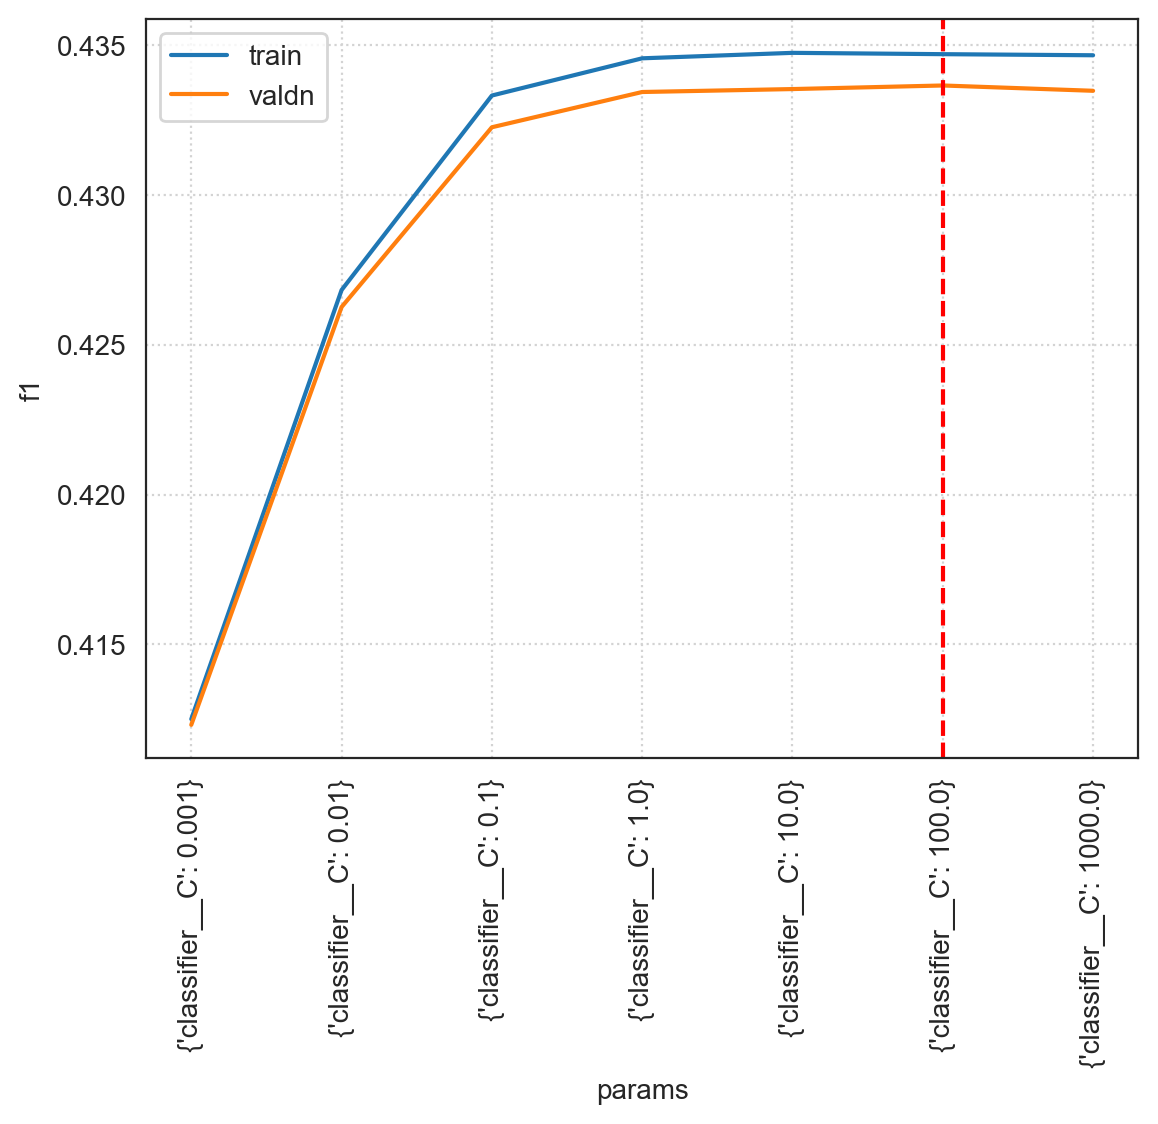

param   f1       recall       precision       balanced_accuracy       accuracy       roc_auc      
  classifier__C test train   test train      test train              test train     test train    test train
0         0.001 0.41  0.41    0.7  0.71      0.29  0.29              0.72  0.72     0.72  0.72     0.8   0.8
1          0.01 0.43  0.43   0.71  0.71       0.3  0.31              0.73  0.73     0.74  0.74    0.81  0.81
2           0.1 0.43  0.43   0.71  0.71      0.31  0.31              0.73  0.73     0.74  0.74    0.82  0.82
3             1 0.43  0.43   0.71  0.71      0.31  0.31              0.73  0.73     0.75  0.75    0.82  0.82
4            10 0.43  0.43   0.71  0.71      0.31  0.31              0.73  0.73     0.75  0.75    0.82  0.82
5         1e+02 0.43  0.43   0.71  0.71      0.31  0.31              0.73  0.73     0.75  0.75    0.82  0.82
6         1e+03 0.43  0.43   0.71  0.71      0.31  0.31              0.73  0.73     0.75  0.75    0.82  0.82



Test_Set Results:
accuracy score:           0.74
f1 score:                 0.43
recall score:             0.71
precision score:          0.31
balanced_accuracy score:  0.73
roc_auc score:            0.73
              precision    recall  f1-score   support

           0       0.94      0.75      0.83    135913
           1       0.31      0.71      0.43     21773

    accuracy                           0.74    157686
   macro avg       0.63      0.73      0.63    157686
weighted avg       0.85      0.74      0.78    157686



In [22]:
cl_pl = Pipeline(
    steps=[
        ('scale', MinMaxScaler()),
        ('classifier', LogisticRegression(n_jobs=n_jobs,class_weight='balanced'))
    ]
)

params = {
    'classifier__C': np.logspace(-3,3,7),
}
gs_lr = GridSearchCV(
    cl_pl,
    params, **grid_search_defaults
)
gs_lr.fit(
    X_train,
    y_train
)

print(f'\n\n{StartBold}Train_Set Tuning Results:{EndBold}')
plot_grid_search_results(gs_lr, grid_search_defaults['refit'])
print(f'\n\n{StartBold}Test_Set Results:{EndBold}')
score_classification_model(gs_lr, X_test, y_test)

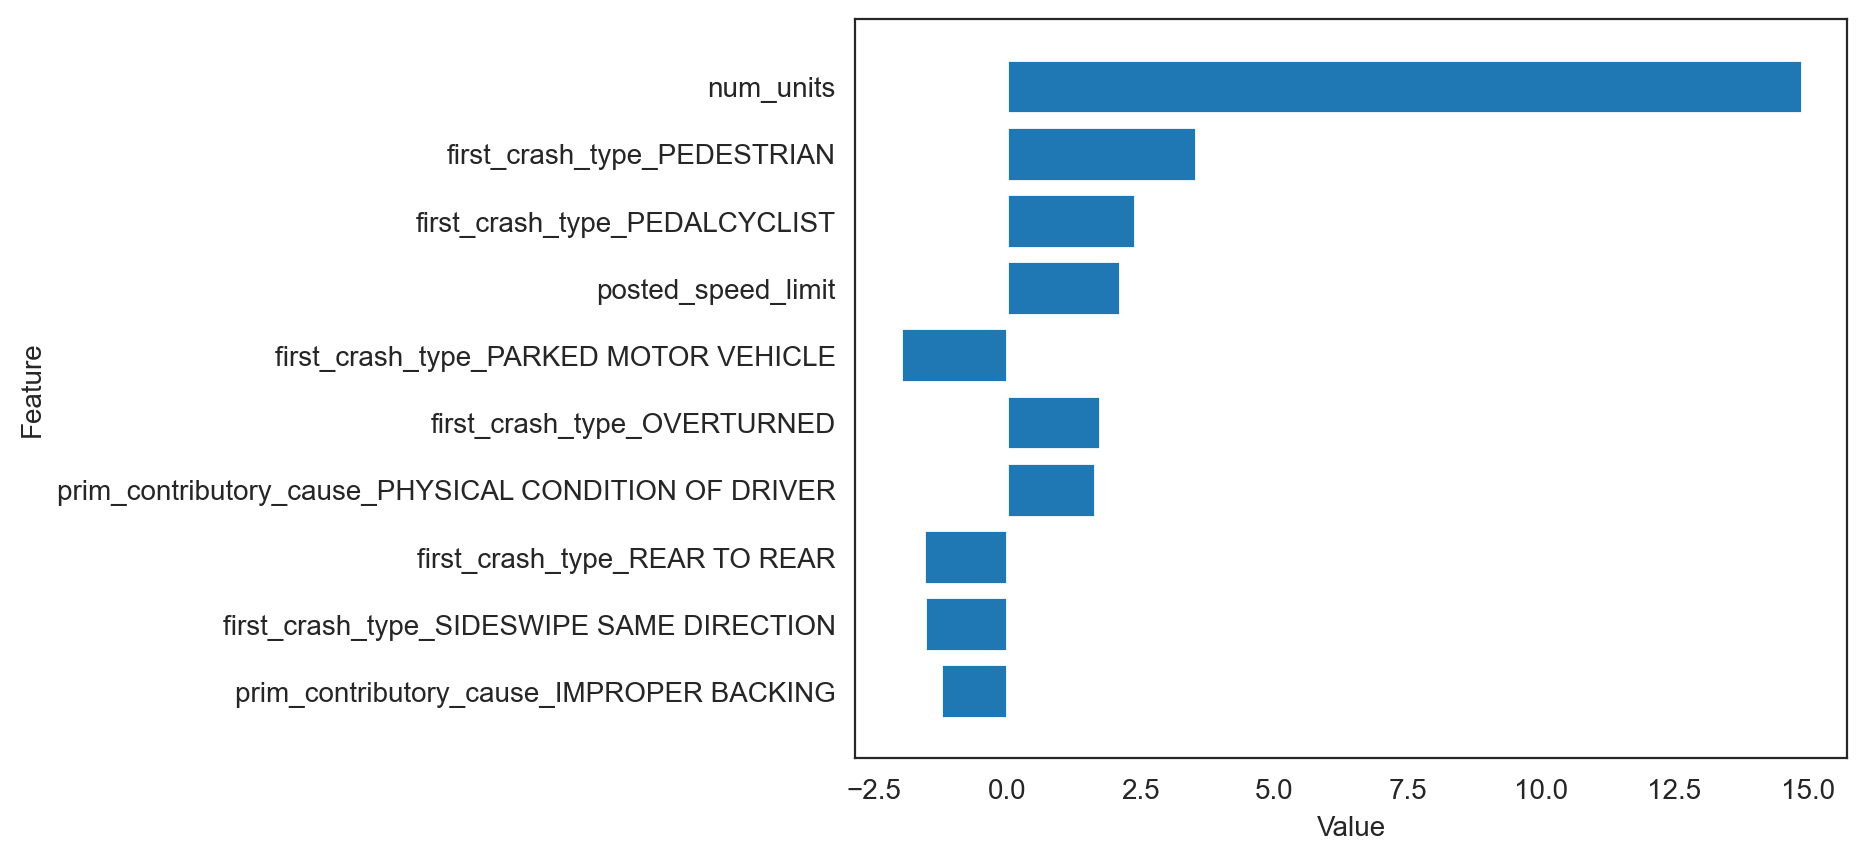

In [23]:
plot_coefficients(gs_lr.best_estimator_.named_steps.classifier.coef_.ravel(),X.columns,10)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


Train_Set Tuning Results:
Estimator:
Pipeline(steps=[('scale', MinMaxScaler()),
                ('classifier',
                 LogisticRegression(class_weight='balanced', n_jobs=4))])

Best Result (Suggested):
	                      train  valdn
	                  f1   0.73   0.73
	              recall   0.71   0.71
	           precision   0.74   0.74
	   balanced_accuracy   0.73   0.73
	            accuracy   0.73   0.73
	             roc_auc   0.82   0.82

Params:
	{'classifier__C': 1.0}



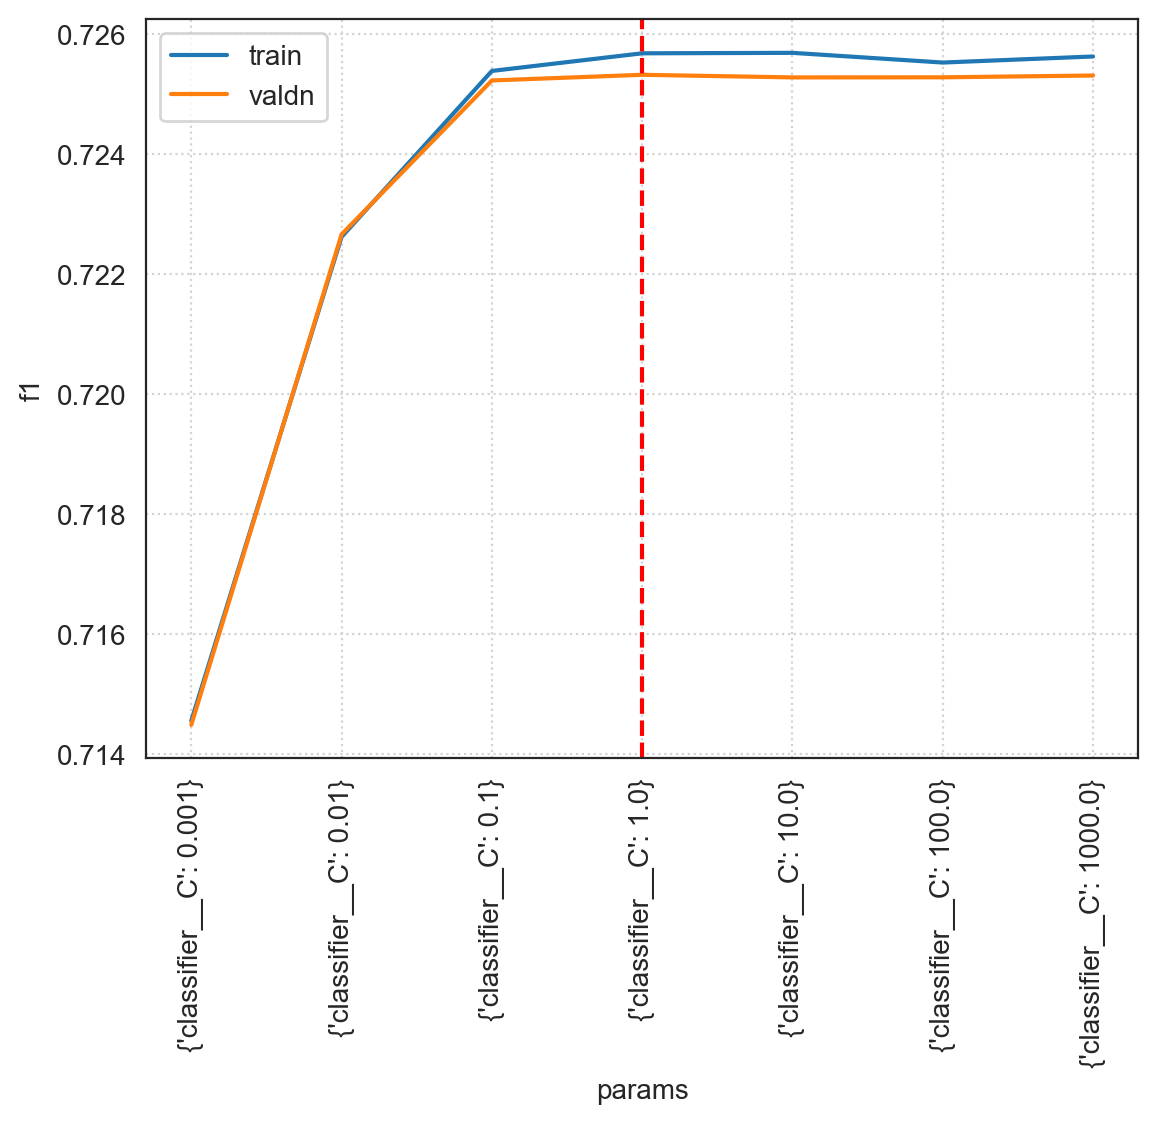

param   f1       recall       precision       balanced_accuracy       accuracy       roc_auc      
  classifier__C test train   test train      test train              test train     test train    test train
0         0.001 0.71  0.71    0.7   0.7      0.72  0.72              0.72  0.72     0.72  0.72     0.8   0.8
1          0.01 0.72  0.72   0.71  0.71      0.74  0.74              0.73  0.73     0.73  0.73    0.81  0.81
2           0.1 0.73  0.73   0.71  0.71      0.74  0.74              0.73  0.73     0.73  0.73    0.82  0.82
3             1 0.73  0.73   0.71  0.71      0.74  0.74              0.73  0.73     0.73  0.73    0.82  0.82
4            10 0.73  0.73   0.71  0.71      0.74  0.74              0.73  0.73     0.73  0.73    0.82  0.82
5         1e+02 0.73  0.73   0.71  0.71      0.74  0.74              0.73  0.73     0.73  0.73    0.82  0.82
6         1e+03 0.73  0.73   0.71  0.71      0.74  0.74              0.73  0.73     0.73  0.73    0.82  0.82



Test_Set Results:
accuracy score:           0.74
f1 score:                 0.43
recall score:             0.71
precision score:          0.31
balanced_accuracy score:  0.73
roc_auc score:            0.73
              precision    recall  f1-score   support

           0       0.94      0.75      0.83    135913
           1       0.31      0.71      0.43     21773

    accuracy                           0.74    157686
   macro avg       0.63      0.73      0.63    157686
weighted avg       0.85      0.74      0.78    157686



In [24]:
cl_pl = Pipeline(
    steps=[
        ('scale', MinMaxScaler()),
        ('classifier', LogisticRegression(n_jobs=n_jobs,class_weight='balanced'))
    ]
)

params = {
    'classifier__C': np.logspace(-3,3,7),
}
gs_lr = GridSearchCV(
    cl_pl,
    params, **grid_search_defaults
)
gs_lr.fit(
    X_train_resampled,
    y_train_resampled
)

print(f'\n\n{StartBold}Train_Set Tuning Results:{EndBold}')
plot_grid_search_results(gs_lr, grid_search_defaults['refit'])
print(f'\n\n{StartBold}Test_Set Results:{EndBold}')
score_classification_model(gs_lr, X_test, y_test)

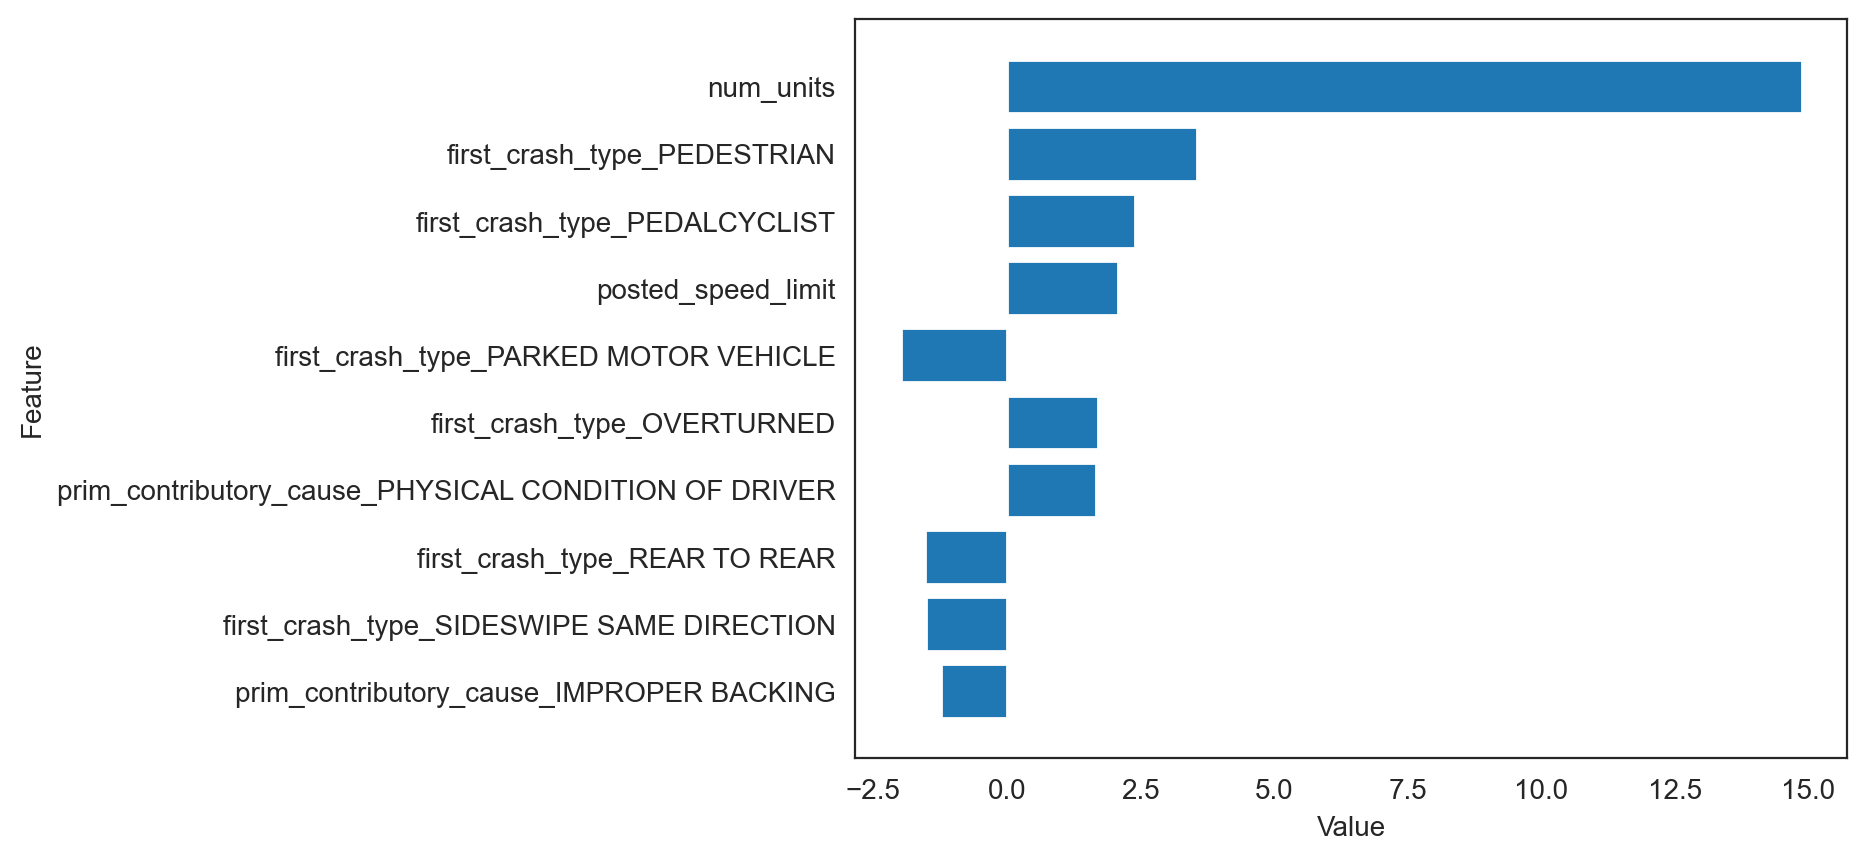

In [25]:
plot_coefficients(gs_lr.best_estimator_.named_steps.classifier.coef_.ravel(),X.columns,10)

## SGDClassifier

Fitting 3 folds for each of 60 candidates, totalling 180 fits


C:\Users\vanam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vanam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vanam\anaconda3\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\vanam\anaconda3\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\va



Train_Set Tuning Results:
Estimator:
Pipeline(steps=[('scale', MinMaxScaler()),
                ('classifier',
                 SGDClassifier(class_weight='balanced', l1_ratio=1,
                               loss='modified_huber', n_jobs=4))])

Best Result (Suggested):
	                      train  valdn
	                  f1   0.44   0.44
	              recall   0.65   0.65
	           precision   0.34   0.34
	   balanced_accuracy   0.72   0.72
	            accuracy   0.77   0.77
	             roc_auc   0.81   0.81

Params:
	{'classifier__alpha': 0.0001, 'classifier__l1_ratio': 1, 'classifier__loss': 'modified_huber'}



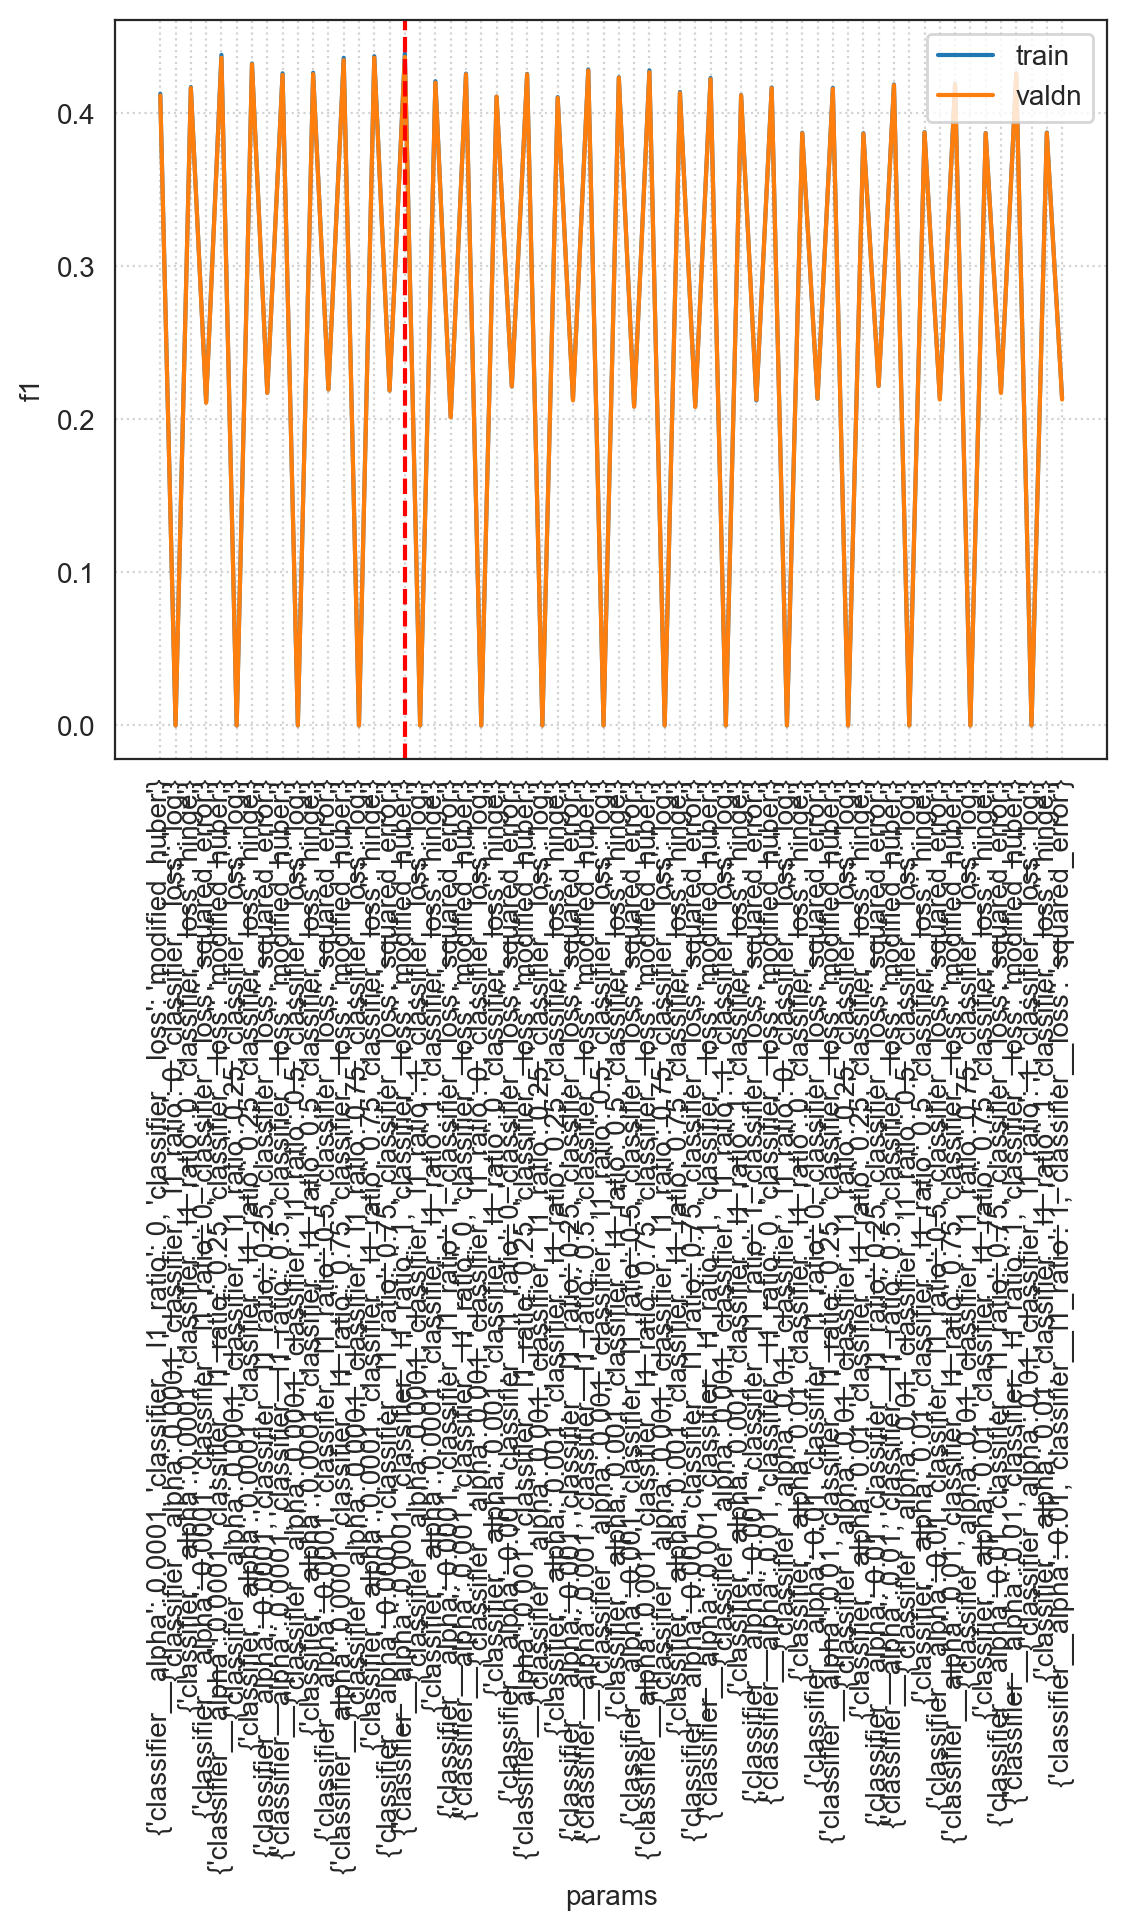

param                                         f1       recall       precision       balanced_accuracy  \
   classifier__alpha classifier__l1_ratio classifier__loss test train   test train      test train              test   
0             0.0001                    0   modified_huber 0.41  0.41   0.74  0.74      0.29  0.29              0.72   
1             0.0001                    0              log    0     0      0     0         0     0                 0   
2             0.0001                    0            hinge 0.42  0.42   0.73  0.73      0.29  0.29              0.72   
3             0.0001                    0    squared_error 0.21  0.21   0.48  0.48      0.14  0.14               0.5   
4             0.0001                 0.25   modified_huber 0.44  0.44   0.67  0.68      0.33  0.33              0.72   
5             0.0001                 0.25              log    0     0      0     0         0     0                 0   
6             0.0001                 0.25            hinge 0.43  0.43    0.7   0.7      0.31  0.31              0.73   
7             0.0001                 0.25    squared_error 0.22  0.22   0.52  0.51      0.14  0.14               0.5   
8             0.0001                  0.5   modified_huber 0.43  0.43   0.71  0.71      0.31  0.31              0.72   
9             0.0001                  0.5              log    0     0      0     0         0     0                 0   
10            0.0001                  0.5            hinge 0.43  0.43   0.71  0.71      0.31  0.31              0.72   
11            0.0001                  0.5    squared_error 0.22  0.22   0.54  0.54      0.14  0.14               0.5   
12            0.0001                 0.75   modified_huber 0.43  0.44   0.68  0.69      0.32  0.32              0.73   
13            0.0001                 0.75              log    0     0      0     0         0     0                 0   
14            0.0001                 0.75            hinge 0.44  0.44   0.67  0.68      0.32  0.32              0.72   
15            0.0001                 0.75    squared_error 0.22  0.22   0.53  0.53      0.14  0.14               0.5   
16            0.0001                    1   modified_huber 0.44  0.44   0.65  0.65      0.34  0.34              0.72   
17            0.0001                    1              log    0     0      0     0         0     0                 0   
18            0.0001                    1            hinge 0.42  0.42   0.72  0.72       0.3   0.3              0.72   
19            0.0001                    1    squared_error  0.2   0.2   0.43  0.43      0.13  0.13              0.49   
20             0.001                    0   modified_huber 0.43  0.43   0.72  0.72       0.3   0.3              0.73   
21             0.001                    0              log    0     0      0     0         0     0                 0   
22             0.001                    0            hinge 0.41  0.41   0.71  0.71      0.29  0.29              0.72   
23             0.001                    0    squared_error 0.22  0.22   0.56  0.56      0.14  0.14               0.5   
24             0.001                 0.25   modified_huber 0.43  0.43   0.71  0.71       0.3   0.3              0.73   
25             0.001                 0.25              log    0     0      0     0         0     0                 0   
26             0.001                 0.25            hinge 0.41  0.41   0.71  0.71      0.29  0.29              0.72   
27             0.001                 0.25    squared_error 0.21  0.21   0.48  0.48      0.14  0.14               0.5   
28             0.001                  0.5   modified_huber 0.43  0.43    0.7  0.71      0.31  0.31              0.73   
29             0.001                  0.5              log    0     0      0     0         0     0                 0   
30             0.001                  0.5            hinge 0.42  0.42   0.68  0.68      0.31  0.31              0.72   
31             0.001                  0.5    squared_er



Test_Set Results:
accuracy score:           0.74
f1 score:                 0.43
recall score:             0.71
precision score:          0.31
balanced_accuracy score:  0.73
roc_auc score:            0.73
              precision    recall  f1-score   support

           0       0.94      0.75      0.83    135913
           1       0.31      0.71      0.43     21773

    accuracy                           0.74    157686
   macro avg       0.63      0.73      0.63    157686
weighted avg       0.85      0.74      0.78    157686



In [26]:
cl_pl = Pipeline(
    steps=[
        ('scale', MinMaxScaler()),
        ('classifier', SGDClassifier(loss='log',n_jobs=n_jobs,class_weight='balanced'))
    ]
)


params = {
    'classifier__l1_ratio': [0, 0.25, 0.5, 0.75, 1],
    'classifier__alpha': [1e-4, 1e-3, 1e-2],
    'classifier__loss': ['modified_huber', 'log', 'hinge', 'squared_error'],
}

gs_sgd = GridSearchCV(
    cl_pl,
    params, **grid_search_defaults
)
gs_sgd.fit(
    X_train,
    y_train
)

print(f'\n\n{StartBold}Train_Set Tuning Results:{EndBold}')
plot_grid_search_results(gs_sgd, grid_search_defaults['refit'])
print(f'\n\n{StartBold}Test_Set Results:{EndBold}')
score_classification_model(gs_sgd, X_test, y_test)

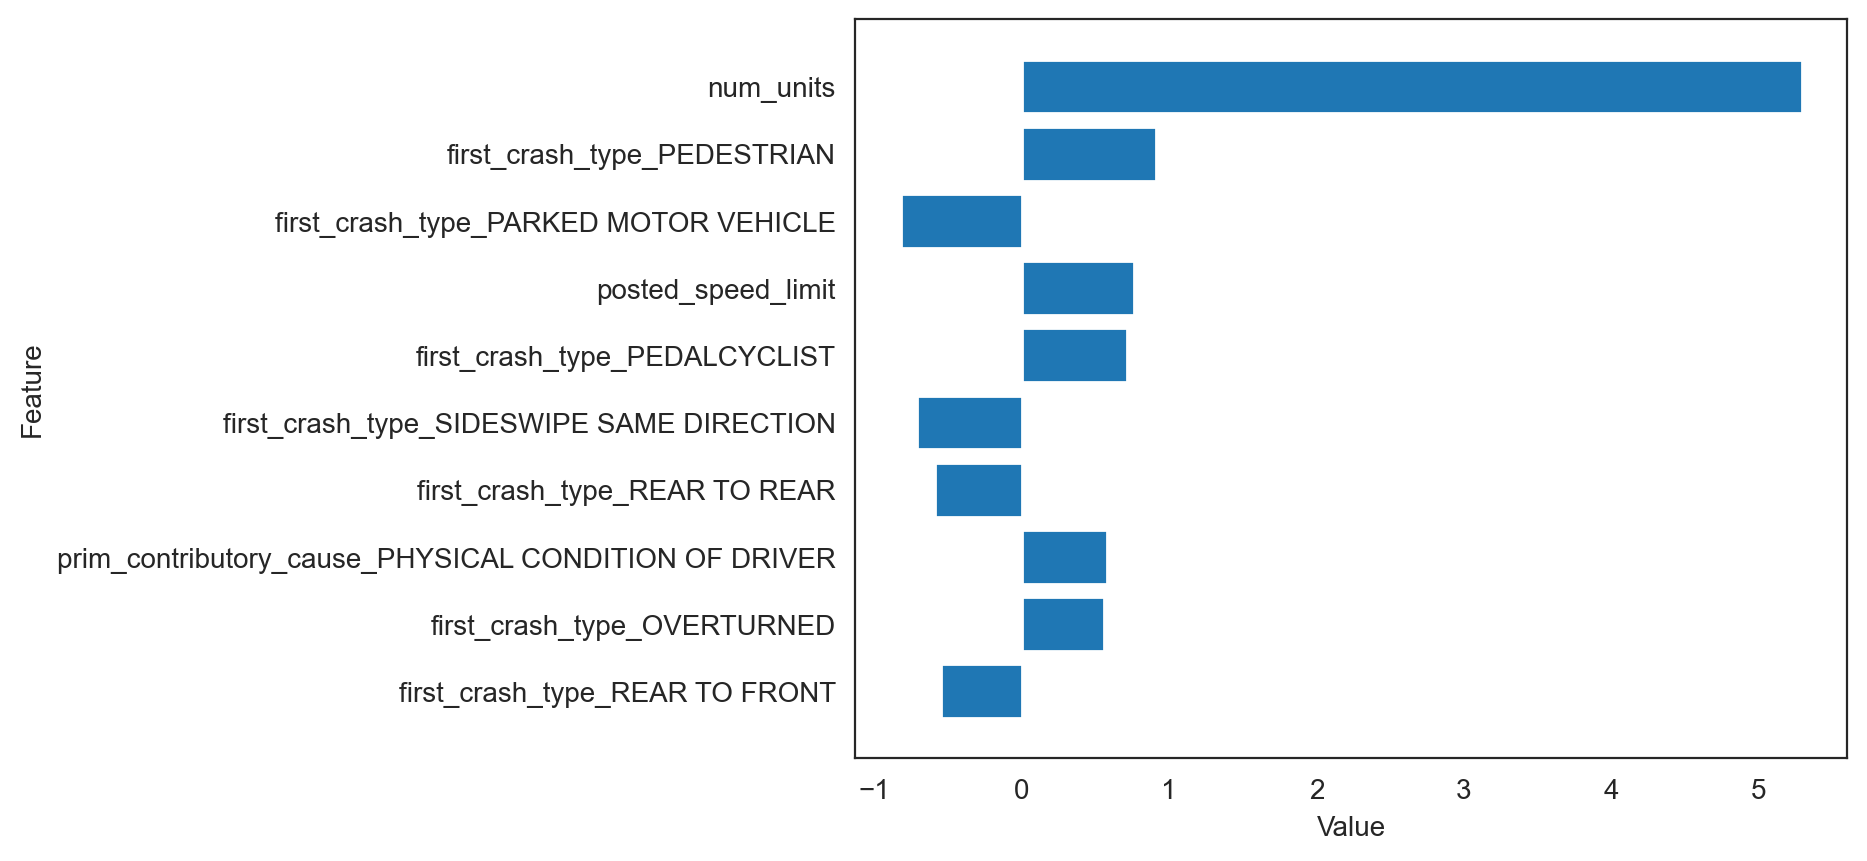

In [27]:
plot_coefficients(gs_sgd.best_estimator_.named_steps.classifier.coef_.ravel(),X.columns,10)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


C:\Users\vanam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vanam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vanam\anaconda3\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\vanam\anaconda3\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\va



Train_Set Tuning Results:
Estimator:
Pipeline(steps=[('scale', MinMaxScaler()),
                ('classifier',
                 SGDClassifier(class_weight='balanced', l1_ratio=0.75,
                               n_jobs=4))])

Best Result (Suggested):
	                      train  valdn
	                  f1   0.73   0.73
	              recall   0.74   0.74
	           precision   0.72   0.72
	   balanced_accuracy   0.73   0.72
	            accuracy   0.73   0.72
	             roc_auc   0.81   0.81

Params:
	{'classifier__alpha': 0.0001, 'classifier__l1_ratio': 0.75, 'classifier__loss': 'hinge'}



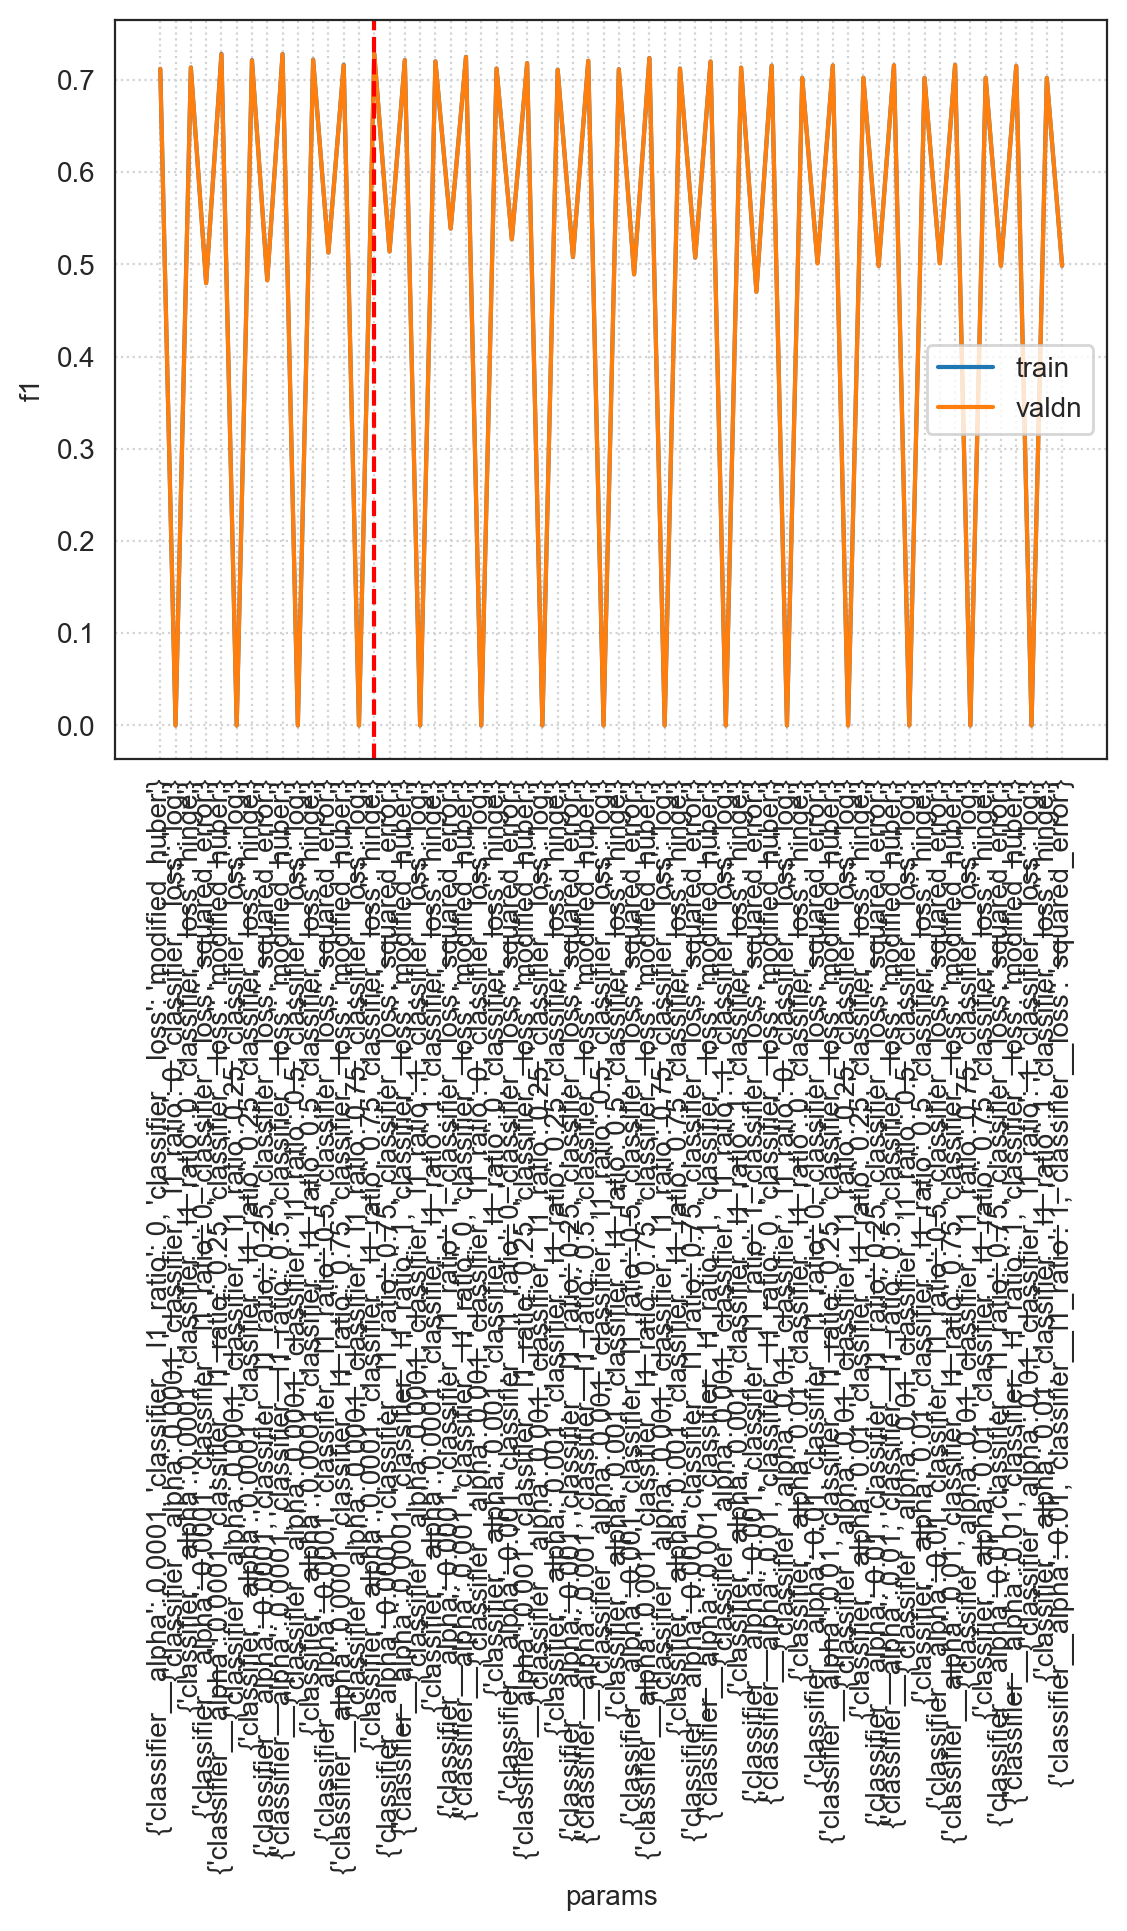

param                                         f1       recall       precision       balanced_accuracy  \
   classifier__alpha classifier__l1_ratio classifier__loss test train   test train      test train              test   
0             0.0001                    0   modified_huber 0.71  0.71   0.68  0.68      0.75  0.75              0.73   
1             0.0001                    0              log    0     0      0     0         0     0                 0   
2             0.0001                    0            hinge 0.71  0.71   0.69  0.69      0.75  0.75              0.73   
3             0.0001                    0    squared_error 0.48  0.48   0.47  0.47      0.49   0.5               0.5   
4             0.0001                 0.25   modified_huber 0.73  0.73   0.73  0.73      0.73  0.73              0.73   
5             0.0001                 0.25              log    0     0      0     0         0     0                 0   
6             0.0001                 0.25            hinge 0.72  0.72   0.71  0.71      0.73  0.73              0.72   
7             0.0001                 0.25    squared_error 0.48  0.48   0.48  0.48      0.49   0.5               0.5   
8             0.0001                  0.5   modified_huber 0.73  0.73   0.73  0.73      0.73  0.73              0.73   
9             0.0001                  0.5              log    0     0      0     0         0     0                 0   
10            0.0001                  0.5            hinge 0.72  0.72   0.71  0.71      0.73  0.73              0.73   
11            0.0001                  0.5    squared_error 0.51  0.51   0.53  0.53       0.5   0.5               0.5   
12            0.0001                 0.75   modified_huber 0.72  0.72   0.69  0.69      0.75  0.75              0.73   
13            0.0001                 0.75              log    0     0      0     0         0     0                 0   
14            0.0001                 0.75            hinge 0.73  0.73   0.74  0.74      0.72  0.72              0.72   
15            0.0001                 0.75    squared_error 0.51  0.51   0.53  0.53       0.5   0.5               0.5   
16            0.0001                    1   modified_huber 0.72  0.72   0.71  0.71      0.74  0.74              0.73   
17            0.0001                    1              log    0     0      0     0         0     0                 0   
18            0.0001                    1            hinge 0.72  0.72   0.71  0.71      0.73  0.73              0.73   
19            0.0001                    1    squared_error 0.54  0.54   0.57  0.57      0.51  0.51              0.51   
20             0.001                    0   modified_huber 0.73  0.73   0.72  0.72      0.73  0.73              0.73   
21             0.001                    0              log    0     0      0     0         0     0                 0   
22             0.001                    0            hinge 0.71  0.71   0.71  0.71      0.72  0.72              0.72   
23             0.001                    0    squared_error 0.53  0.53   0.55  0.55       0.5   0.5               0.5   
24             0.001                 0.25   modified_huber 0.72  0.72    0.7   0.7      0.74  0.74              0.73   
25             0.001                 0.25              log    0     0      0     0         0     0                 0   
26             0.001                 0.25            hinge 0.71  0.71    0.7   0.7      0.72  0.72              0.72   
27             0.001                 0.25    squared_error 0.51  0.51   0.52  0.52       0.5   0.5               0.5   
28             0.001                  0.5   modified_huber 0.72  0.72    0.7   0.7      0.74  0.74              0.73   
29             0.001                  0.5              log    0     0      0     0         0     0                 0   
30             0.001                  0.5            hinge 0.71  0.71    0.7   0.7      0.72  0.72              0.72   
31             0.001                  0.5    squared_er



Test_Set Results:
accuracy score:           0.73
f1 score:                 0.42
recall score:             0.72
precision score:          0.30
balanced_accuracy score:  0.72
roc_auc score:            0.72
              precision    recall  f1-score   support

           0       0.94      0.73      0.82    135913
           1       0.30      0.72      0.42     21773

    accuracy                           0.73    157686
   macro avg       0.62      0.72      0.62    157686
weighted avg       0.85      0.73      0.77    157686



In [28]:
cl_pl = Pipeline(
    steps=[
        ('scale', MinMaxScaler()),
        ('classifier', SGDClassifier(loss='log',n_jobs=n_jobs,class_weight='balanced'))
    ]
)

params = {
    'classifier__l1_ratio': [0,.25,.5,.75,1],
    'classifier__alpha': [1e-4, 1e-3, 1e-2],#np.logspace(-4,-3,5).round(5),
    'classifier__loss': ['modified_huber', 'log', 'hinge', 'squared_error'],
#    'classifier__alpha': [.0006,.0007,.0008],
}
gs_sgd = GridSearchCV(
    cl_pl,
    params, **grid_search_defaults
)
gs_sgd.fit(
    X_train_resampled,
    y_train_resampled
)

print(f'\n\n{StartBold}Train_Set Tuning Results:{EndBold}')
plot_grid_search_results(gs_sgd, grid_search_defaults['refit'])
print(f'\n\n{StartBold}Test_Set Results:{EndBold}')
score_classification_model(gs_sgd, X_test, y_test)

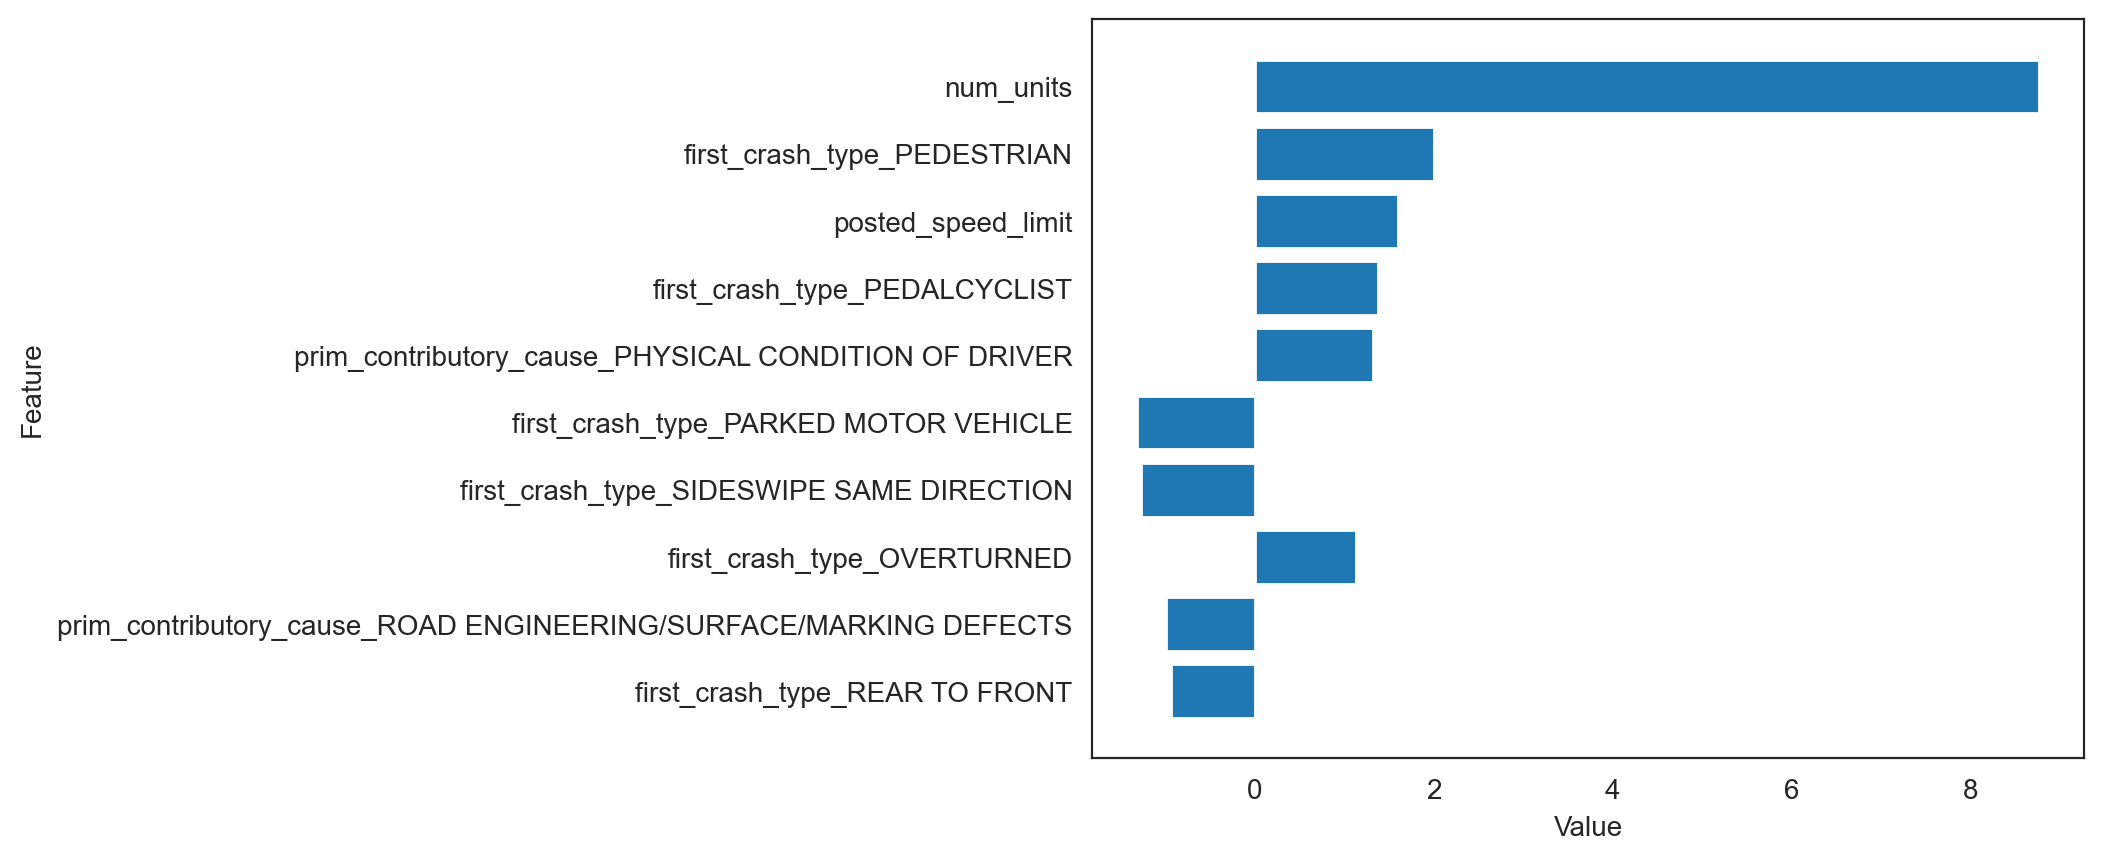

In [29]:
plot_coefficients(gs_sgd.best_estimator_.named_steps.classifier.coef_.ravel(),X.columns,10)

## Kernel Approximation

Fitting 3 folds for each of 30 candidates, totalling 90 fits


Train_Set Tuning Results:
Estimator:
Pipeline(steps=[('scale', MinMaxScaler()),
                ('rbf', RBFSampler(gamma=0.01, random_state=2021)),
                ('classifier',
                 SGDClassifier(class_weight='balanced', n_jobs=4,
                               random_state=2021))])

Best Result (Suggested):
	                      train  valdn
	                  f1   0.39   0.39
	              recall   0.68   0.68
	           precision   0.28   0.28
	   balanced_accuracy   0.70   0.70
	            accuracy   0.71   0.71
	             roc_auc   0.78   0.78

Params:
	{'classifier__alpha': 0.0001, 'rbf__gamma': 0.01}



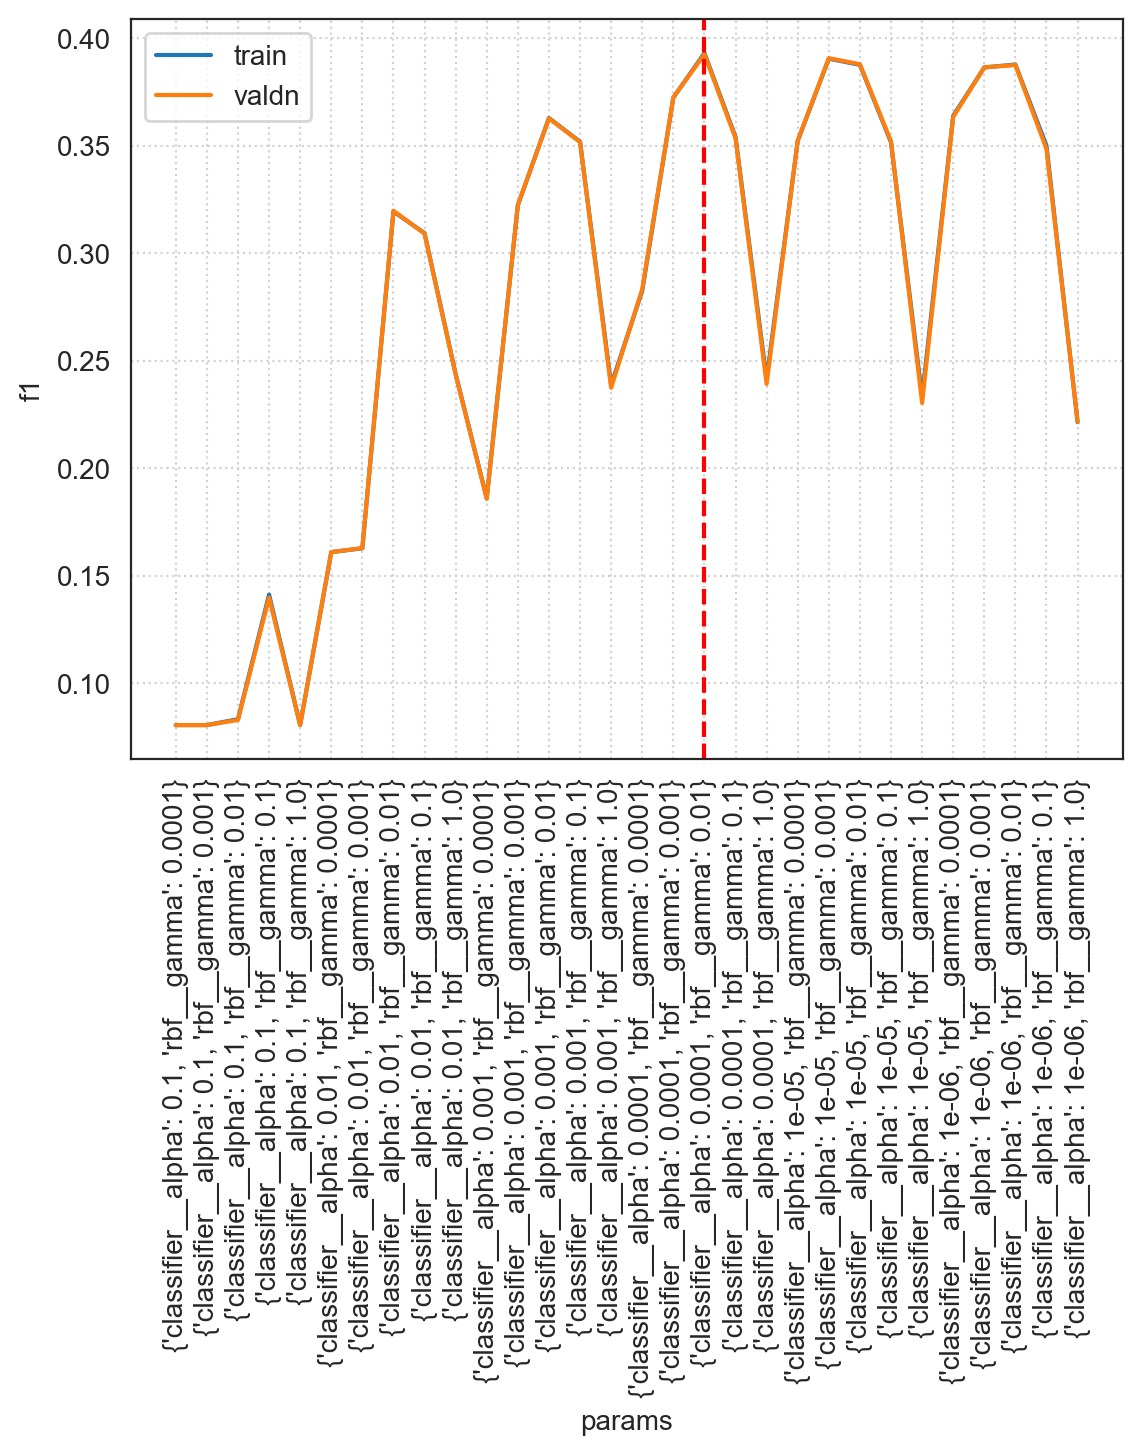

param               f1       recall       precision       balanced_accuracy       accuracy        \
   classifier__alpha rbf__gamma  test train   test train      test train              test train     test train   
0                0.1     0.0001  0.08  0.08   0.33  0.33     0.046 0.046               0.5   0.5     0.62  0.62   
1                0.1      0.001  0.08  0.08   0.33  0.33     0.046 0.046               0.5   0.5     0.62  0.62   
2                0.1       0.01 0.083 0.083   0.33  0.33      0.18  0.19               0.5   0.5     0.62  0.62   
3                0.1        0.1  0.14  0.14   0.36  0.36      0.15  0.15              0.53  0.53     0.65  0.65   
4                0.1          1  0.08  0.08   0.33  0.33     0.046 0.046               0.5   0.5     0.62  0.62   
5               0.01     0.0001  0.16  0.16   0.67  0.67     0.092 0.092               0.5   0.5     0.38  0.38   
6               0.01      0.001  0.16  0.16   0.67  0.67      0.26  0.26               0.5   0.5     0.38  0.38   
7               0.01       0.01  0.32  0.32   0.57  0.57      0.22  0.22              0.63  0.63     0.67  0.67   
8               0.01        0.1  0.31  0.31   0.64  0.64       0.2   0.2              0.62  0.62     0.61  0.61   
9               0.01          1  0.24  0.24   0.96  0.96      0.14  0.14              0.51  0.51     0.18  0.18   
10             0.001     0.0001  0.19  0.19   0.53  0.53      0.12  0.12              0.54  0.54     0.55  0.55   
11             0.001      0.001  0.32  0.32   0.51  0.51      0.23  0.23              0.62  0.62      0.7   0.7   
12             0.001       0.01  0.36  0.36    0.7   0.7      0.24  0.24              0.68  0.68     0.66  0.66   
13             0.001        0.1  0.35  0.35   0.65  0.65      0.24  0.24              0.66  0.66     0.67  0.67   
14             0.001          1  0.24  0.24   0.54  0.55      0.15  0.15              0.53  0.53     0.52  0.52   
15            0.0001     0.0001  0.28  0.28   0.45  0.45      0.28  0.28               0.6   0.6     0.71  0.71   
16            0.0001      0.001  0.37  0.37   0.65  0.65      0.26  0.26              0.68  0.68      0.7   0.7   
17            0.0001       0.01  0.39  0.39   0.68  0.68      0.28  0.28               0.7   0.7     0.71  0.71   
18            0.0001        0.1  0.35  0.35   0.66  0.66      0.24  0.24              0.67  0.67     0.67  0.67   
19            0.0001          1  0.24  0.24   0.57  0.57      0.15  0.15              0.53  0.53      0.5  0.51   
20             1e-05     0.0001  0.35  0.35   0.76  0.76      0.23  0.23              0.68  0.68     0.62  0.62   
21             1e-05      0.001  0.39  0.39   0.69  0.69      0.28  0.28               0.7   0.7      0.7   0.7   
22             1e-05       0.01  0.39  0.39   0.72  0.72      0.27  0.27               0.7   0.7     0.69  0.68   
23             1e-05        0.1  0.35  0.35   0.66  0.66      0.24  0.24              0.66  0.66     0.66  0.66   
24             1e-05          1  0.23  0.23   0.49   0.5      0.15  0.15              0.53  0.53     0.55  0.55   
25             1e-06     0.0001  0.36  0.36   0.78  0.78      0.24  0.24              0.69  0.69     0.62  0.62   
26             1e-06      0.001  0.39  0.39    0.7  0.71      0.29  0.29              0.69  0.69     0.68  0.68   
27             1e-06       0.01  0.39  0.39   0.71  0.71      0.27  0.27               0.7   0.7     0.69  0.69   
28             1e-06        0.1  0.35  0.35   0.64  0.65      0.24  0.24              0.66  0.66     0.67  0.67   
29             1e-06          1  0.22  0.22   0.48  0.48      0.15  0.15              0.52  0.52     0.55  0.55   

   roc_auc        
      test train  
0     0.69  0.69  
1     0.69  0.69  
2     0.69  0.69  
3     0.67  0.67  
4     0.54  0.55  
5     0.69  0.69  
6     0.69  0.69  
7     0.69  0.69  
8     0.68  0.68  
9     0.54  0.55  
10    0.69  0.69  
11    0.69  0.69  
12    0.75  0.75  
13    0.72  0.72  
14    0.55  0.55  
15    0.69 



Test_Set Results:
accuracy score:           0.67
f1 score:                 0.38
recall score:             0.73
precision score:          0.26
balanced_accuracy score:  0.70
roc_auc score:            0.70
              precision    recall  f1-score   support

           0       0.94      0.66      0.78    135913
           1       0.26      0.73      0.38     21773

    accuracy                           0.67    157686
   macro avg       0.60      0.70      0.58    157686
weighted avg       0.84      0.67      0.72    157686



In [30]:
cl_pl = Pipeline(
    steps=[
        ('scale', MinMaxScaler()),
        ('rbf', RBFSampler(random_state=random_state)),
        ('classifier', SGDClassifier(class_weight='balanced', random_state=random_state, n_jobs=n_jobs))
    ])

params = {
    'rbf__gamma': np.logspace(-4,0,5),
#    'classifier__alpha': np.logspace(-5,0,5),
    'classifier__alpha': 10.0**-np.arange(1,7),
}
gs_sgdka = GridSearchCV(
    cl_pl,
    params, **grid_search_defaults
)
gs_sgdka.fit(
    X_train,
    y_train
)

print(f'\n\n{StartBold}Train_Set Tuning Results:{EndBold}')
plot_grid_search_results(gs_sgdka, grid_search_defaults['refit'])
print(f'\n\n{StartBold}Test_Set Results:{EndBold}')
score_classification_model(gs_sgdka, X_test, y_test)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


Train_Set Tuning Results:
Estimator:
Pipeline(steps=[('scale', MinMaxScaler()),
                ('rbf', RBFSampler(gamma=0.01, random_state=2021)),
                ('classifier',
                 SGDClassifier(class_weight='balanced', n_jobs=4,
                               random_state=2021))])

Best Result (Suggested):
	                      train  valdn
	                  f1   0.69   0.69
	              recall   0.69   0.69
	           precision   0.70   0.70
	   balanced_accuracy   0.70   0.70
	            accuracy   0.70   0.70
	             roc_auc   0.77   0.77

Params:
	{'classifier__alpha': 0.0001, 'rbf__gamma': 0.01}



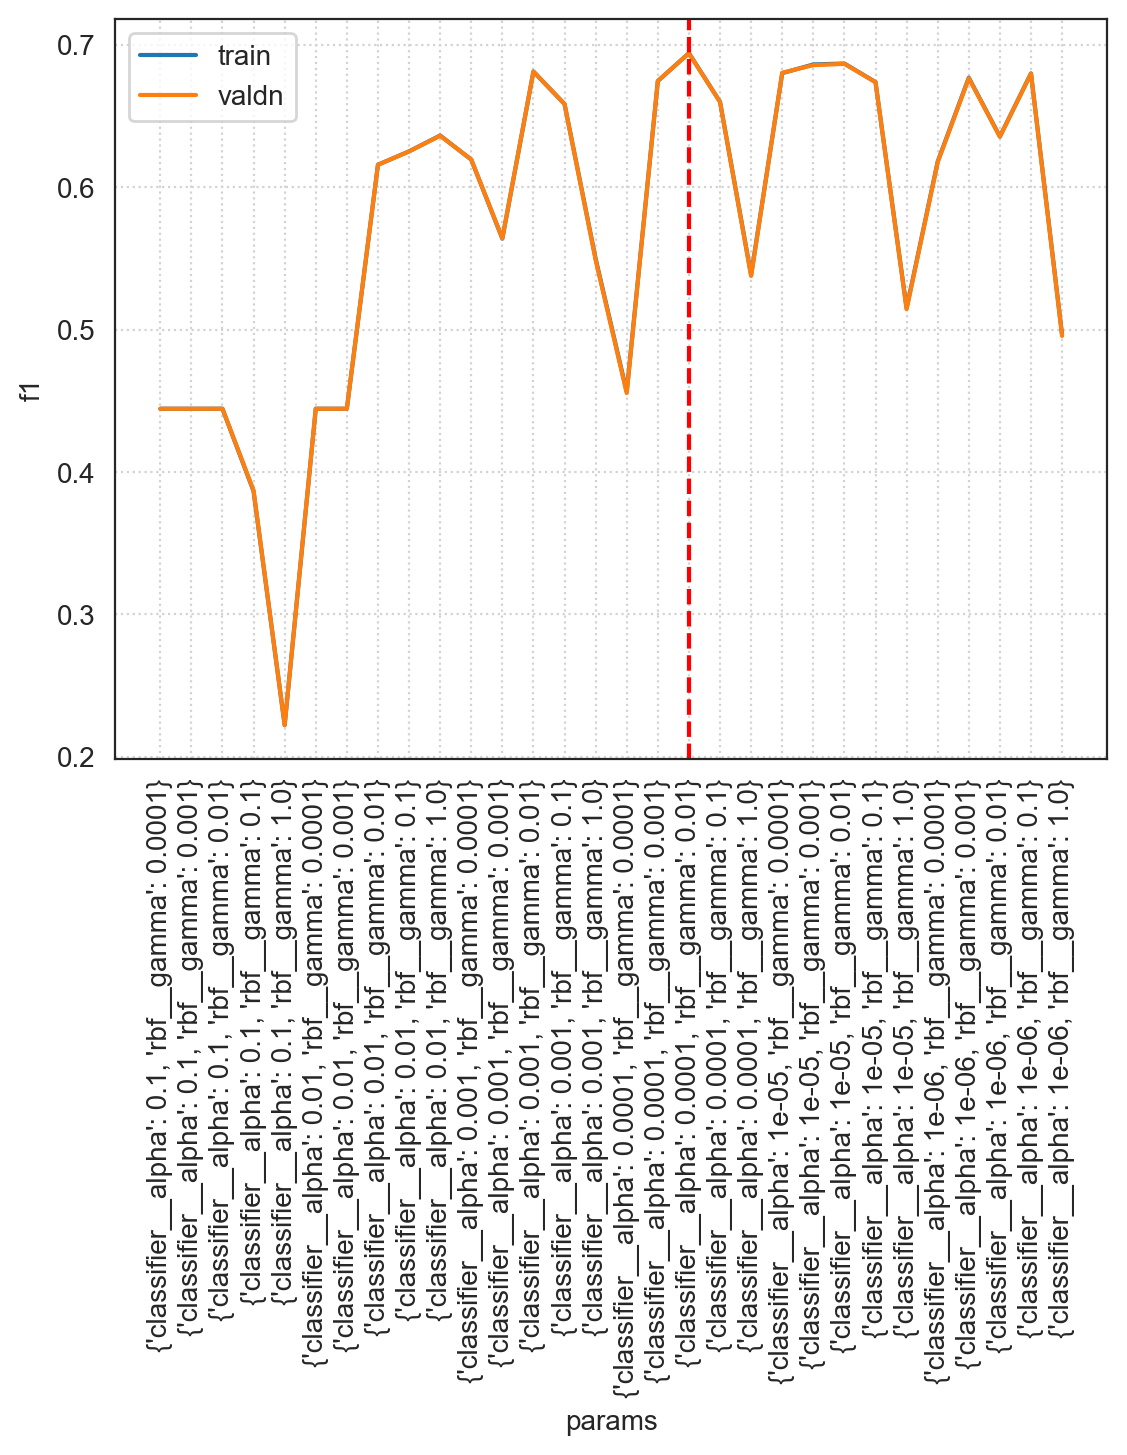

param              f1       recall       precision       balanced_accuracy       accuracy        \
   classifier__alpha rbf__gamma test train   test train      test train              test train     test train   
0                0.1     0.0001 0.44  0.44   0.67  0.67      0.33  0.33               0.5   0.5      0.5   0.5   
1                0.1      0.001 0.44  0.44   0.67  0.67      0.33  0.33               0.5   0.5      0.5   0.5   
2                0.1       0.01 0.44  0.44   0.67  0.67      0.33  0.33               0.5   0.5      0.5   0.5   
3                0.1        0.1 0.39  0.39   0.42  0.42      0.41  0.41              0.56  0.56     0.56  0.56   
4                0.1          1 0.22  0.22   0.33  0.33      0.17  0.17               0.5   0.5      0.5   0.5   
5               0.01     0.0001 0.44  0.44   0.67  0.67      0.33  0.33               0.5   0.5      0.5   0.5   
6               0.01      0.001 0.44  0.44   0.67  0.67      0.33  0.33               0.5   0.5      0.5   0.5   
7               0.01       0.01 0.62  0.62    0.6   0.6      0.63  0.63              0.63  0.63     0.63  0.63   
8               0.01        0.1 0.63  0.63   0.63  0.63      0.62  0.62              0.62  0.62     0.62  0.62   
9               0.01          1 0.64  0.64   0.88  0.88      0.51  0.51              0.51  0.51     0.51  0.51   
10             0.001     0.0001 0.62  0.62   0.81  0.81      0.56  0.56              0.54  0.54     0.54  0.54   
11             0.001      0.001 0.56  0.56   0.49  0.49      0.67  0.67              0.62  0.62     0.62  0.62   
12             0.001       0.01 0.68  0.68   0.69  0.69      0.67  0.67              0.68  0.68     0.68  0.68   
13             0.001        0.1 0.66  0.66   0.65  0.65      0.67  0.67              0.66  0.66     0.66  0.66   
14             0.001          1 0.55  0.55   0.57  0.57      0.53  0.53              0.53  0.53     0.53  0.53   
15            0.0001     0.0001 0.46  0.46   0.38  0.38      0.71  0.71               0.6   0.6      0.6   0.6   
16            0.0001      0.001 0.67  0.67   0.67  0.67      0.68  0.68              0.68  0.68     0.68  0.68   
17            0.0001       0.01 0.69  0.69   0.69  0.69       0.7   0.7               0.7   0.7      0.7   0.7   
18            0.0001        0.1 0.66  0.66   0.65  0.65      0.67  0.67              0.67  0.67     0.67  0.67   
19            0.0001          1 0.54  0.54   0.54  0.54      0.53  0.53              0.53  0.53     0.53  0.53   
20             1e-05     0.0001 0.68  0.68   0.69  0.69      0.68  0.68              0.68  0.68     0.68  0.68   
21             1e-05      0.001 0.69  0.69   0.66  0.66      0.72  0.72               0.7   0.7      0.7   0.7   
22             1e-05       0.01 0.69  0.69   0.66  0.66      0.72  0.72               0.7   0.7      0.7   0.7   
23             1e-05        0.1 0.67  0.67   0.69  0.69      0.65  0.65              0.66  0.66     0.66  0.66   
24             1e-05          1 0.51  0.52   0.52  0.52      0.53  0.53              0.53  0.53     0.53  0.53   
25             1e-06     0.0001 0.62  0.62   0.53  0.53      0.78  0.78              0.68  0.68     0.68  0.68   
26             1e-06      0.001 0.68  0.68   0.64  0.64      0.74  0.74               0.7   0.7      0.7   0.7   
27             1e-06       0.01 0.64  0.64   0.59  0.59      0.75  0.75              0.68  0.68     0.68  0.68   
28             1e-06        0.1 0.68  0.68   0.73  0.73      0.64  0.64              0.66  0.66     0.66  0.66   
29             1e-06          1  0.5   0.5   0.47  0.47      0.53  0.53              0.53  0.53     0.53  0.53   

   roc_auc        
      test train  
0     0.69  0.69  
1     0.69  0.69  
2     0.69  0.69  
3     0.66  0.67  
4     0.55  0.55  
5     0.69  0.69  
6     0.69  0.69  
7     0.69  0.69  
8     0.68  0.68  
9     0.55  0.55  
10    0.69  0.69  
11    0.69  0.69  
12    0.75  0.75  
13    0.72  0.72  
14    0.55  0.55  
15    0.69  0.69  
16    0.75  0.75  
17   



Test_Set Results:
accuracy score:           0.72
f1 score:                 0.39
recall score:             0.67
precision score:          0.28
balanced_accuracy score:  0.70
roc_auc score:            0.70
              precision    recall  f1-score   support

           0       0.93      0.72      0.81    135913
           1       0.28      0.67      0.39     21773

    accuracy                           0.72    157686
   macro avg       0.61      0.70      0.60    157686
weighted avg       0.84      0.72      0.76    157686



In [31]:
cl_pl = Pipeline(
    steps=[
        ('scale', MinMaxScaler()),
        ('rbf', RBFSampler(random_state=random_state)),
        ('classifier', SGDClassifier(class_weight='balanced', random_state=random_state, n_jobs=n_jobs))
    ])

params = {
    'rbf__gamma': np.logspace(-4,0,5),
#    'classifier__alpha': np.logspace(-5,0,5),
    'classifier__alpha': 10.0**-np.arange(1,7),
}
gs_sgdka = GridSearchCV(
    cl_pl,
    params, **grid_search_defaults
)
gs_sgdka.fit(
    X_train_resampled,
    y_train_resampled
)

print(f'\n\n{StartBold}Train_Set Tuning Results:{EndBold}')
plot_grid_search_results(gs_sgdka, grid_search_defaults['refit'])
print(f'\n\n{StartBold}Test_Set Results:{EndBold}')
score_classification_model(gs_sgdka, X_test, y_test)

## PCA

In [32]:
from sklearn.decomposition import PCA

In [33]:
_pca = PCA(2).fit(X_train)

In [34]:
_pca.explained_variance_ratio_

array([0.67, 0.21])

In [35]:
X_train_pca = _pca.transform(X_train)

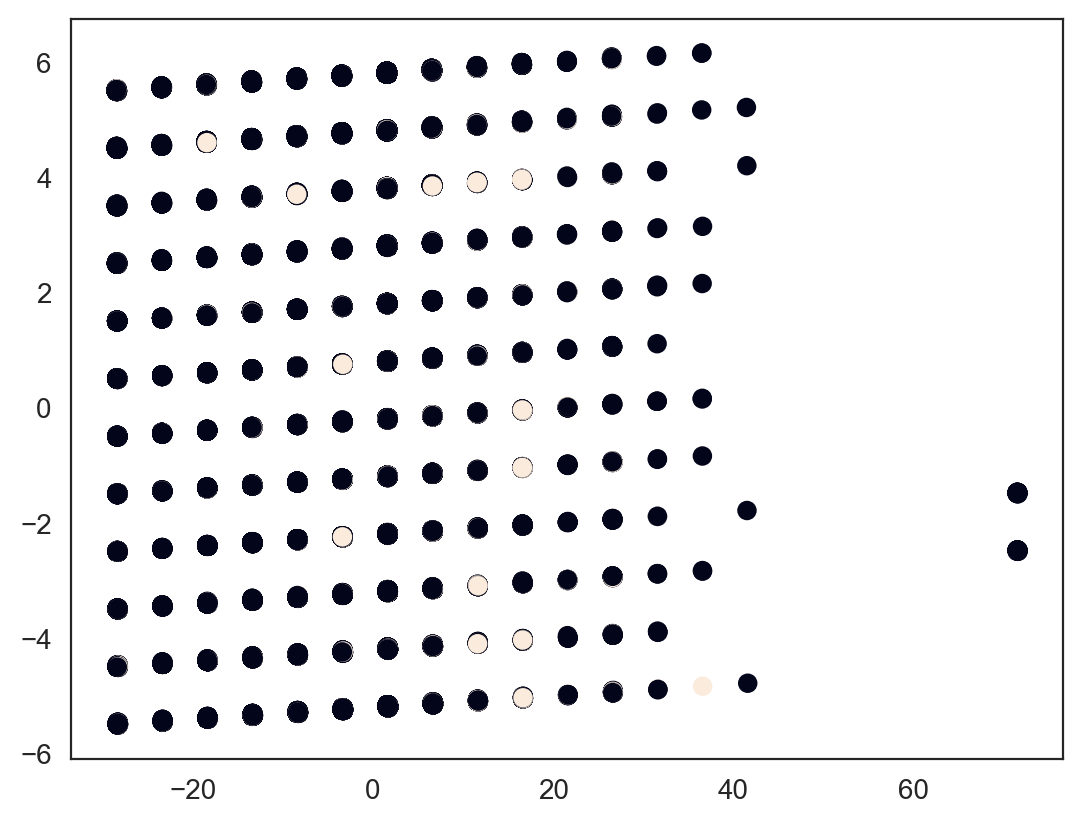

In [36]:
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train);

Fitting 3 folds for each of 60 candidates, totalling 180 fits


Train_Set Tuning Results:
Estimator:
Pipeline(steps=[('scale', MinMaxScaler()), ('pca', PCA(n_components=2)),
                ('classifier',
                 SGDClassifier(class_weight='balanced', l1_ratio=1,
                               loss='log_loss', n_jobs=4))])

Best Result (Suggested):
	                      train  valdn
	                  f1   0.28   0.28
	              recall   0.55   0.55
	           precision   0.19   0.19
	   balanced_accuracy   0.59   0.59
	            accuracy   0.62   0.62
	             roc_auc   0.63   0.63

Params:
	{'classifier__alpha': 0.0001, 'classifier__l1_ratio': 1, 'classifier__loss': 'log_loss'}



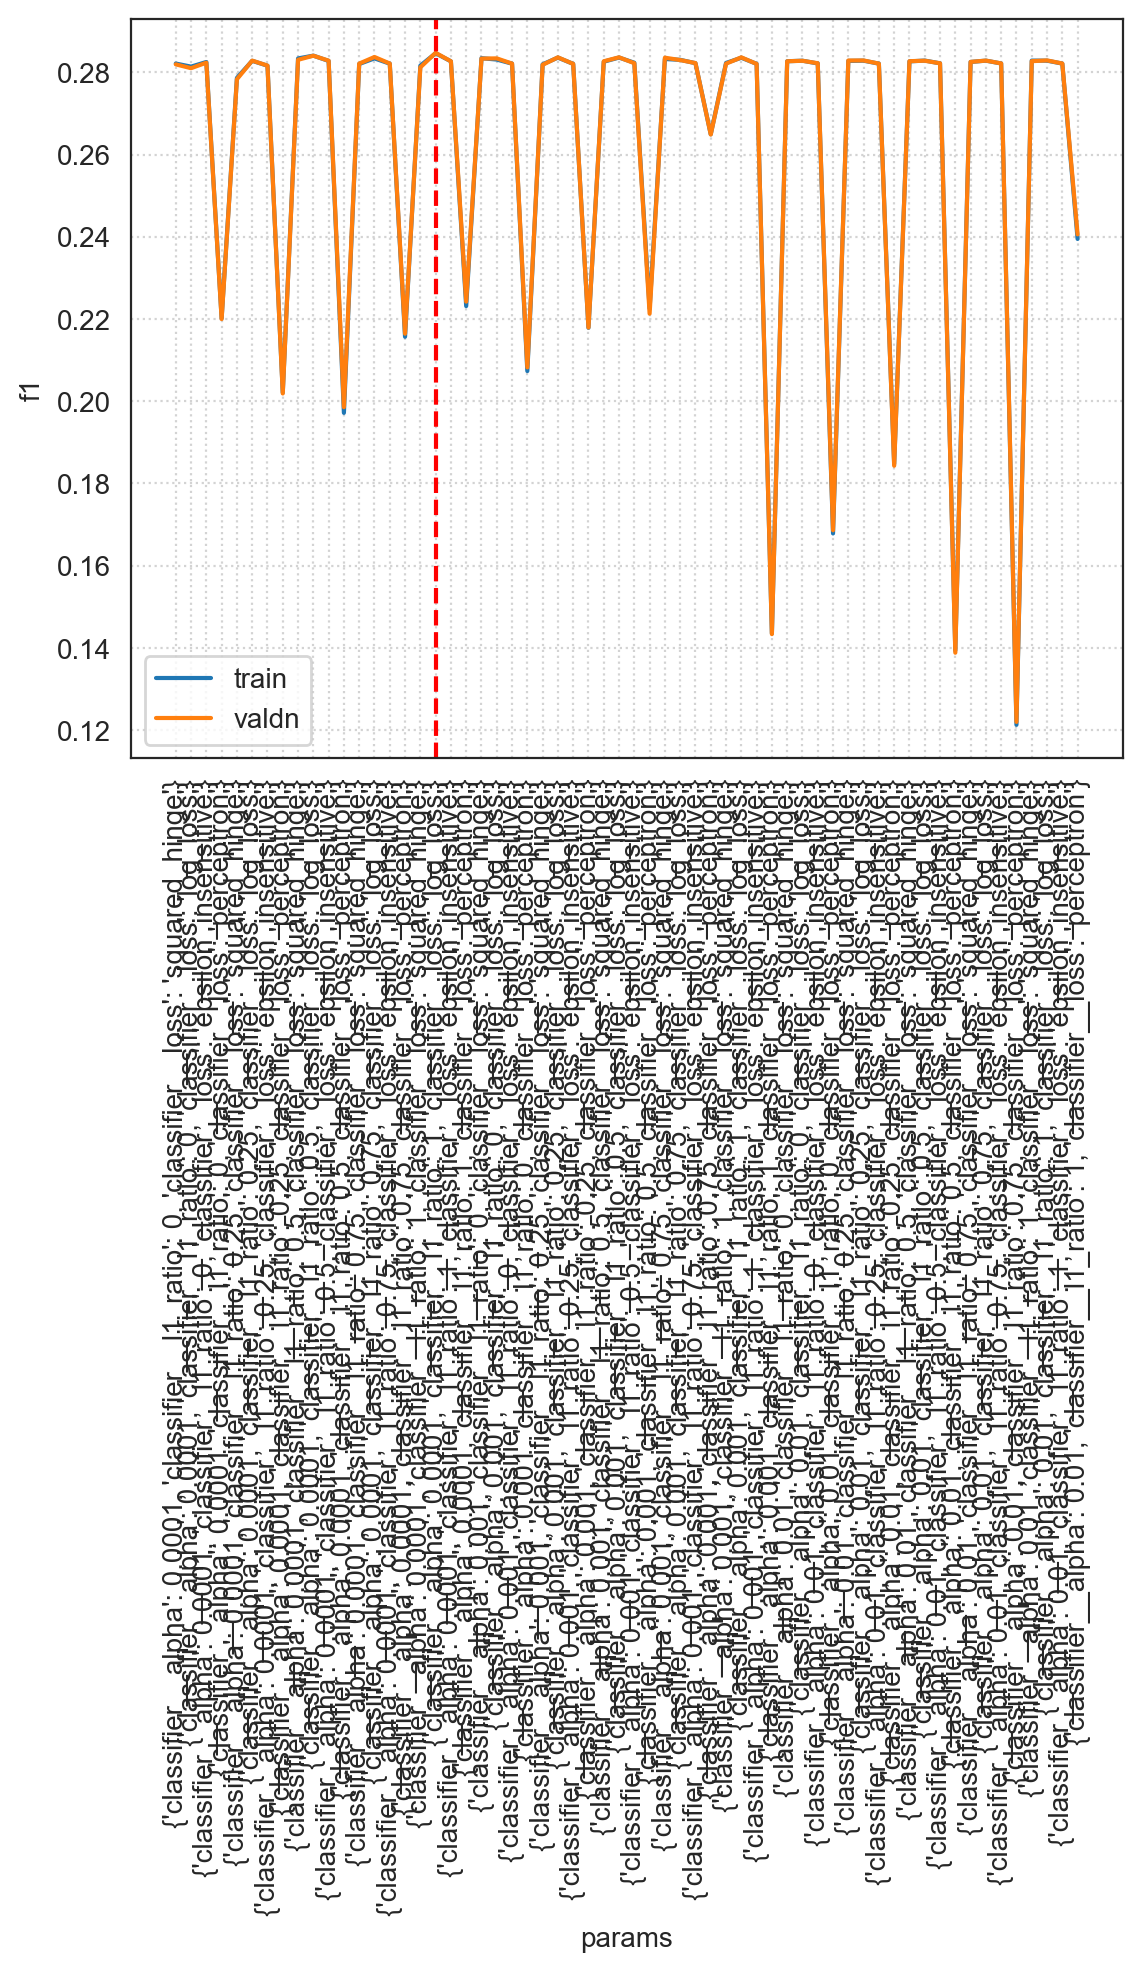

param                                             f1       recall       precision        \
   classifier__alpha classifier__l1_ratio     classifier__loss test train   test train      test train   
0             0.0001                    0        squared_hinge 0.28  0.28   0.58  0.58      0.19  0.19   
1             0.0001                    0             log_loss 0.28  0.28   0.55  0.55      0.19  0.19   
2             0.0001                    0  epsilon_insensitive 0.28  0.28   0.56  0.56      0.19  0.19   
3             0.0001                    0           perceptron 0.22  0.22   0.62  0.62      0.15  0.15   
4             0.0001                 0.25        squared_hinge 0.28  0.28   0.52  0.52      0.19  0.19   
5             0.0001                 0.25             log_loss 0.28  0.28   0.56  0.56      0.19  0.19   
6             0.0001                 0.25  epsilon_insensitive 0.28  0.28   0.56  0.56      0.19  0.19   
7             0.0001                 0.25           perceptron  0.2   0.2   0.62  0.62      0.12  0.12   
8             0.0001                  0.5        squared_hinge 0.28  0.28   0.56  0.56      0.19  0.19   
9             0.0001                  0.5             log_loss 0.28  0.28   0.55  0.55      0.19  0.19   
10            0.0001                  0.5  epsilon_insensitive 0.28  0.28   0.55  0.55      0.19  0.19   
11            0.0001                  0.5           perceptron  0.2   0.2   0.44  0.43      0.13  0.13   
12            0.0001                 0.75        squared_hinge 0.28  0.28   0.55  0.55      0.19  0.19   
13            0.0001                 0.75             log_loss 0.28  0.28   0.55  0.55      0.19  0.19   
14            0.0001                 0.75  epsilon_insensitive 0.28  0.28   0.56  0.56      0.19  0.19   
15            0.0001                 0.75           perceptron 0.22  0.22    0.6   0.6      0.14  0.14   
16            0.0001                    1        squared_hinge 0.28  0.28   0.55  0.55      0.19  0.19   
17            0.0001                    1             log_loss 0.28  0.28   0.55  0.55      0.19  0.19   
18            0.0001                    1  epsilon_insensitive 0.28  0.28   0.56  0.56      0.19  0.19   
19            0.0001                    1           perceptron 0.22  0.22   0.63  0.62      0.14  0.14   
20             0.001                    0        squared_hinge 0.28  0.28   0.56  0.56      0.19  0.19   
21             0.001                    0             log_loss 0.28  0.28   0.56  0.56      0.19  0.19   
22             0.001                    0  epsilon_insensitive 0.28  0.28   0.56  0.56      0.19  0.19   
23             0.001                    0           perceptron 0.21  0.21   0.74  0.74      0.12  0.12   
24             0.001                 0.25        squared_hinge 0.28  0.28   0.56  0.56      0.19  0.19   
25             0.001                 0.25             log_loss 0.28  0.28   0.55  0.55      0.19  0.19   
26             0.001                 0.25  epsilon_insensitive 0.28  0.28   0.56  0.56      0.19  0.19   
27             0.001                 0.25           perceptron 0.22  0.22   0.58  0.58      0.17  0.17   
28             0.001                  0.5        squared_hinge 0.28  0.28   0.55  0.55      0.19  0.19   
29             0.001                  0.5             log_loss 0.28  0.28   0.56  0.56      0.19  0.19   
30             0.001                  0.5  epsilon_insensitive 0.28  0.28   0.56  0.56      0.19  0.19   
31             0.001                  0.5           perceptron 0.22  0.22   0.52  0.52      0.16  0.17   
32             0.001                 0.75        squared_hinge 0.28  0.28   0.56  0.56      0.19  0.19   
33             0.001                 0.75             log_loss 0.28  0.28   0.55  0.55      0.19  0.19   
34             0.001                 0.75  epsilon_insensitive 0.28  0.28   0.56  0.56      0.19  0.19   
35             0.001                 0.75           perceptron 0.26  0.26   0.71  0.71      0



Test_Set Results:
accuracy score:           0.62
f1 score:                 0.28
recall score:             0.55
precision score:          0.19
balanced_accuracy score:  0.59
roc_auc score:            0.59
              precision    recall  f1-score   support

           0       0.90      0.63      0.74    135913
           1       0.19      0.55      0.28     21773

    accuracy                           0.62    157686
   macro avg       0.54      0.59      0.51    157686
weighted avg       0.80      0.62      0.68    157686



In [37]:
cl_pl = Pipeline(
    steps=[
        ('scale', MinMaxScaler()),
        ('pca', PCA(2)),
        ('classifier', SGDClassifier(loss='log',n_jobs=n_jobs,class_weight='balanced'))
    ]
)

params = {
#    'classifier__class_weight': ['balanced',{1:2},{1:3},{1:4}],
    'classifier__l1_ratio': [0,.25,.5,.75,1],
    'classifier__alpha': [1e-4, 1e-3, 1e-2],#np.logspace(-4,-3,5).round(5),
    'classifier__loss': ['squared_hinge', 'log_loss', 'epsilon_insensitive', 'perceptron'],
#    'classifier__alpha': [.0006,.0007,.0008],
}
gs_sgd = GridSearchCV(
    cl_pl,
    params, **grid_search_defaults
)
gs_sgd.fit(
    X_train,
    y_train
)

print(f'\n\n{StartBold}Train_Set Tuning Results:{EndBold}')
plot_grid_search_results(gs_sgd, grid_search_defaults['refit'])
print(f'\n\n{StartBold}Test_Set Results:{EndBold}')
score_classification_model(gs_sgd, X_test, y_test)